In [1]:
pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [2]:
#전 현 모든 선수들의 full name, first name, last name, id, 현재 선수 활동 여부
from nba_api.stats.static import players
player_dict = players.get_players()
player_dict
vic_info = [x for x in player_dict if x['first_name']=='Victor']
vic_info

[{'id': 2349,
  'full_name': 'Victor Alexander',
  'first_name': 'Victor',
  'last_name': 'Alexander',
  'is_active': False},
 {'id': 201964,
  'full_name': 'Victor Claver',
  'first_name': 'Victor',
  'last_name': 'Claver',
  'is_active': False},
 {'id': 203506,
  'full_name': 'Victor Oladipo',
  'first_name': 'Victor',
  'last_name': 'Oladipo',
  'is_active': True},
 {'id': 1641705,
  'full_name': 'Victor Wembanyama',
  'first_name': 'Victor',
  'last_name': 'Wembanyama',
  'is_active': True}]

In [3]:
#모든 팀의 id, full_name, abbreviation, nick name, 도시 이름, 주, 설립연도
from nba_api.stats.static import teams
teams = teams.get_teams()
teams

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966},
 {'id': 1610612742,
  'full_name': 'Dallas Mavericks',
  'abbreviation': 'DAL',
  'nickname': 'Mavericks',
  'city': 'Dallas',

In [4]:
from datetime import datetime

dt_now = str(datetime.now().date())
print(dt_now)
dt_now = ''.join(c for c in dt_now if c not in '-')

2024-02-21


In [5]:
dal_fullname = 'Dallas Mavericks'
dal_info = [x for x in teams if x['full_name']==dal_fullname][0]
dal_info

{'id': 1610612742,
 'full_name': 'Dallas Mavericks',
 'abbreviation': 'DAL',
 'nickname': 'Mavericks',
 'city': 'Dallas',
 'state': 'Texas',
 'year_founded': 1980}

C:\Users\qkrdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\qkrdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\qkrdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\qkrdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

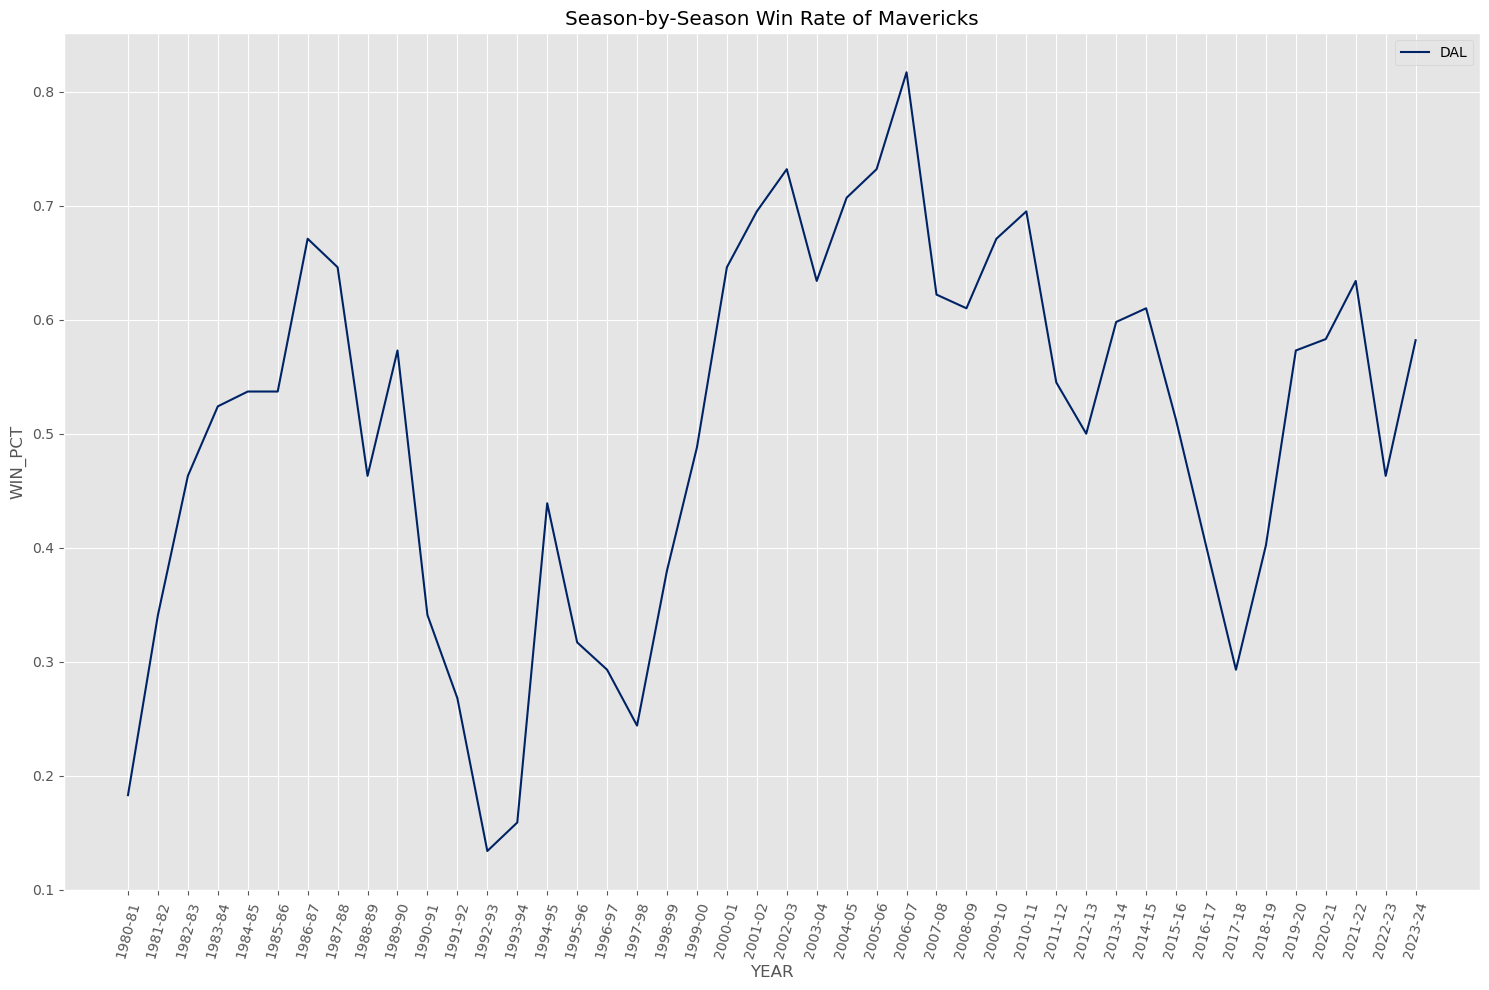

In [6]:
from nba_api.stats.endpoints import TeamYearByYearStats
dal_seasons = TeamYearByYearStats(team_id=dal_info['id']).get_data_frames()[0]
# dal_seasons

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(15,10))
plt.style.use('ggplot')
sns.lineplot(data=dal_seasons, x='YEAR', y='WIN_PCT', color='#002366', label = 'DAL')
plt.xticks(rotation=75)
plt.legend()
plt.title(r'Season-by-Season Win Rate of Mavericks')
plt.tight_layout()

In [7]:
from nba_api.stats.endpoints import TeamDetails
dal_teamdetails = TeamDetails(team_id = dal_info['id']).get_data_frames()[0]
dal_teamdetails

,TEAM_ID,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,1610612742,DAL,Mavericks,1980,Dallas,American Airlines Center,19200,Mark Cuban,Nico Harrison,Jason Kidd,Texas Legends


In [8]:
#nba_api EndPoint
#1. AllTimeLeadersGrids: 역대 리더들에 대한 그리드 데이터
from nba_api.stats.endpoints import AllTimeLeadersGrids
alltimeleadersgrids = AllTimeLeadersGrids().get_data_frames()[0]
alltimeleadersgrids

#GP: Games Played(게임 수)

,PLAYER_ID,PLAYER_NAME,GP,GP_RANK,IS_ACTIVE_FLAG
0,305,Robert Parish,1611,1,N
1,76003,Kareem Abdul-Jabbar,1560,2,N
2,1713,Vince Carter,1541,3,N
3,1717,Dirk Nowitzki,1522,4,N
4,304,John Stockton,1504,5,N
5,252,Karl Malone,1476,6,N
6,2544,LeBron James,1470,7,Y
7,708,Kevin Garnett,1462,8,N
8,788,Kevin Willis,1424,9,N
9,1891,Jason Terry,1410,10,N


In [9]:
#2. AssistLeaders: 어시스트 리더들의 정보
from nba_api.stats.endpoints import AssistLeaders
assistleaders = AssistLeaders().get_data_frames()[0]
assistleaders

,RANK,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,AST
0,1,1610612754,IND,Indiana Pacers,1730
1,2,1610612759,SAS,San Antonio Spurs,1612
2,3,1610612761,TOR,Toronto Raptors,1604
3,4,1610612747,LAL,Los Angeles Lakers,1596
4,5,1610612762,UTA,Utah Jazz,1591


In [10]:
#3. AssistTracker: 어시스트 추적 정보
#무엇을 나타내는지 잘 모르겠음
from nba_api.stats.endpoints import AssistTracker
assisttracker = AssistTracker().get_data_frames()[0]
assisttracker

,ASSISTS
0,57727


In [11]:
#4. BoxScoreAdvancedV2: 상세 박스 스코어
#2024년 2월 14일 Dallas VS San Antonio 경기
from nba_api.stats.endpoints import BoxScoreAdvancedV2
boxscoreadvanced = BoxScoreAdvancedV2(game_id = '0022300785').get_data_frames()[0]
boxscoreadvanced
#FGA = field goal attempts,
#FTA = free throw attempts
#TM_TOV_PCT: 팀 공격 기회 중 턴오버의 비율
#EFG_PCT: 유효 득점 퍼센트 eFG = (야투+0.5X경기당 3점 슛)/야투시도
#TS_PCT: True Shooting Percentage //  TS = (points scored) / {2*(필드골 시도 + (0.44*자유투 시도)}
#USG_PCT: 선수가 팀 공격에서 사용되는 비율(공을 얼마나 많이 소유하고 있는가) //  USG% = (FGA + Possession Ending FTA + TO) / POSS

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0022300785,1610612759,SAS,San Antonio,1630577,Julian Champagnie,Julian,F,,18.000000:12,...,0.0,0.625,0.625,0.083,0.086,113.74,113.38,94.48,43,0.076
1,0022300785,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,,24.000000:59,...,14.3,0.450,0.460,0.203,0.205,108.59,107.59,89.66,56,0.054
2,0022300785,1610612759,SAS,San Antonio,1641705,Victor Wembanyama,Victor,C,,27.000000:12,...,6.7,0.524,0.560,0.352,0.366,109.55,110.29,91.91,63,0.172
3,0022300785,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,,31.000000:17,...,4.2,0.281,0.318,0.228,0.227,105.72,105.10,87.59,68,0.064
4,0022300785,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,,20.000000:10,...,0.0,0.250,0.250,0.151,0.152,110.73,109.49,91.24,46,0.023
5,0022300785,1610612759,SAS,San Antonio,1628380,Zach Collins,Zach,,,20.000000:48,...,7.1,0.333,0.333,0.196,0.199,99.05,99.23,82.69,43,0.218
6,0022300785,1610612759,SAS,San Antonio,1629640,Keldon Johnson,Keldon,,,20.000000:18,...,8.3,0.136,0.136,0.240,0.245,102.17,104.07,86.72,44,-0.081
7,0022300785,1610612759,SAS,San Antonio,1631104,Blake Wesley,Blake,,,27.000000:50,...,17.6,0.500,0.580,0.162,0.166,100.85,100.89,84.07,59,0.072
8,0022300785,1610612759,SAS,San Antonio,1631103,Malaki Branham,Malaki,,,20.000000:47,...,7.7,0.818,0.830,0.235,0.244,100.56,101.62,84.68,44,0.172
9,0022300785,1610612759,SAS,San Antonio,1626224,Cedi Osman,Cedi,,,17.000000:35,...,0.0,0.000,0.000,0.023,0.024,101.71,103.73,86.45,38,0.020


In [12]:
#5. BoxScoreFourFactorsV2: 박스 스코어 네 요소(shooting(40%), turnover(25%), rebounding(20%), free throw(15%))
from nba_api.stats.endpoints import BoxScoreFourFactorsV2
boxscorefourfactors = BoxScoreFourFactorsV2(game_id = '0022300785').get_data_frames()[0]
boxscorefourfactors
#OPP: oppenent로 해당 선수가 코트 위에 있을 때 상대팀에 허용한 수치
#FTA RATE: (FTA)/(FGA)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
0,0022300785,1610612759,SAS,San Antonio,1630577,Julian Champagnie,Julian,F,,18.000000:12,0.462,0.256,0.069,0.143,0.583,0.056,0.233,0.267
1,0022300785,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,,24.000000:59,0.330,0.151,0.122,0.171,0.561,0.163,0.144,0.217
2,0022300785,1610612759,SAS,San Antonio,1641705,Victor Wembanyama,Victor,C,,27.000000:12,0.491,0.207,0.079,0.167,0.702,0.038,0.197,0.211
3,0022300785,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,,31.000000:17,0.390,0.147,0.099,0.214,0.592,0.167,0.134,0.222
4,0022300785,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,,20.000000:10,0.344,0.178,0.084,0.172,0.550,0.200,0.154,0.250
5,0022300785,1610612759,SAS,San Antonio,1628380,Zach Collins,Zach,,,20.000000:48,0.298,0.071,0.165,0.267,0.450,0.200,0.092,0.200
6,0022300785,1610612759,SAS,San Antonio,1629640,Keldon Johnson,Keldon,,,20.000000:18,0.317,0.049,0.160,0.179,0.613,0.200,0.047,0.176
7,0022300785,1610612759,SAS,San Antonio,1631104,Blake Wesley,Blake,,,27.000000:50,0.464,0.127,0.138,0.258,0.625,0.038,0.153,0.158
8,0022300785,1610612759,SAS,San Antonio,1631103,Malaki Branham,Malaki,,,20.000000:47,0.512,0.171,0.116,0.286,0.658,0.000,0.182,0.154
9,0022300785,1610612759,SAS,San Antonio,1626224,Cedi Osman,Cedi,,,17.000000:35,0.556,0.167,0.080,0.235,0.727,0.061,0.136,0.200


In [13]:
#6. BoxScoreMatchupsV3: 박스 스코어 매치업 (상대와의 매치업별 통계)
from nba_api.stats.endpoints import BoxScoreMatchupsV3
boxscorematchups = BoxScoreMatchupsV3(game_id = '0022300785').get_data_frames()[0]
# boxscorematchups.head(5)
# print(boxscorematchups.to_string()) : 모든 columns을 볼 수 있는 코드
sum = 0
for x in range(220):
    if boxscorematchups['matchupThreePointersMade'][x] != 0:
        print(boxscorematchups['nameIOff'][x], boxscorematchups['nameIDef'][x])
        sum += boxscorematchups['matchupThreePointersMade'][x]

J. Green J. Sochan
J. Green D. Vassell
P. Washington J. Sochan
K. Irving M. Branham
K. Irving J. Champagnie
K. Irving J. Sochan
K. Irving B. Wesley
L. Doncic B. Wesley
T. Hardaway Jr. T. Jones
T. Hardaway Jr. D. Vassell
J. Hardy C. Osman
J. Champagnie L. Doncic
J. Sochan K. Irving
V. Wembanyama D. Gafford
D. Vassell T. Hardaway Jr.
K. Johnson D. Lively II
M. Branham T. Hardaway Jr.
M. Branham J. Hardy
M. Branham B. Williams


In [14]:
#9. BoxScoreMiscV2: 박스 스코어 기타
from nba_api.stats.endpoints import BoxScoreMiscV2
boxscoremisc = BoxScoreMiscV2(game_id = '0022300785').get_data_frames()[0]
boxscoremisc
#FB: Fast Break Points(속공)
#BLKA : Blocks Against(당한 블락 횟수)
#PF: Personal Foul
#PFD: Personal Foul Drawn(파울 유도 횟수)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PTS_FB,PTS_PAINT,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,BLK,BLKA,PF,PFD
0,0022300785,1610612759,SAS,San Antonio,1630577,Julian Champagnie,Julian,F,,18.000000:12,...,0.0,2.0,4.0,2.0,8.0,26.0,0.0,0.0,0.0,0.0
1,0022300785,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,,24.000000:59,...,1.0,6.0,6.0,2.0,6.0,32.0,0.0,2.0,2.0,1.0
2,0022300785,1610612759,SAS,San Antonio,1641705,Victor Wembanyama,Victor,C,,27.000000:12,...,0.0,14.0,6.0,2.0,10.0,40.0,3.0,2.0,0.0,6.0
3,0022300785,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,,31.000000:17,...,5.0,4.0,6.0,4.0,6.0,38.0,0.0,3.0,1.0,2.0
4,0022300785,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,,20.000000:10,...,0.0,2.0,4.0,2.0,6.0,24.0,0.0,1.0,2.0,0.0
5,0022300785,1610612759,SAS,San Antonio,1628380,Zach Collins,Zach,,,20.000000:48,...,0.0,6.0,8.0,2.0,2.0,20.0,3.0,0.0,2.0,0.0
6,0022300785,1610612759,SAS,San Antonio,1629640,Keldon Johnson,Keldon,,,20.000000:18,...,0.0,0.0,8.0,2.0,2.0,26.0,1.0,1.0,1.0,1.0
7,0022300785,1610612759,SAS,San Antonio,1631104,Blake Wesley,Blake,,,27.000000:50,...,2.0,6.0,10.0,2.0,6.0,36.0,0.0,0.0,0.0,2.0
8,0022300785,1610612759,SAS,San Antonio,1631103,Malaki Branham,Malaki,,,20.000000:47,...,0.0,6.0,8.0,0.0,6.0,26.0,0.0,0.0,0.0,2.0
9,0022300785,1610612759,SAS,San Antonio,1626224,Cedi Osman,Cedi,,,17.000000:35,...,0.0,0.0,6.0,2.0,4.0,24.0,0.0,0.0,1.0,0.0


In [15]:
#10. BoxScorePlayerTrackV2: 박스 스코어 플레이어 추적
from nba_api.stats.endpoints import BoxScorePlayerTrackV2
boxscoreplayertrack = BoxScorePlayerTrackV2(game_id = '0022300785').get_data_frames()[0]
boxscoreplayertrack
# print(boxscoreplayertrack.to_string())
# SPD: 선수가 달린 속도
# DIST: 선수가 이동한 거리
# ORBC: 공격 리바운드 중 선수가 잡은 공의 수
# DRBC: 수비 리바운드 중 선수가 잡은 공의 수
# RBC: 전체 리바운드 중 선수가 잡은 공의 수
# TCHS: 선수의 총 터치 수
# SAST: 슈팅 어시스트의 수
# FTAST: 자유투 어시스트의 수
# PASS: 전체 패스 수
# AST: 어시스트의 수
# CFGM: 필드골의 수
# CFGA: 필드골 시도 횟수
# CFG_PCT: 필드골 성공률
# UFGM: 언포스드 필드골의 수 (U는 uncontested(노마크))
# UFGA: 언포스드 필드골 시도 횟수
# UFG_PCT: 언포스드 필드골 성공률
# FG_PCT: 전체 필드골 성공률
# DFGM: 수비 골의 수(D는 상대 수비가 있다는 뜻)
# DFGA: 수비 골 시도 횟수
# DFG_PCT: 수비 골 성공률

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,SPD,...,CFGM,CFGA,CFG_PCT,UFGM,UFGA,UFG_PCT,FG_PCT,DFGM,DFGA,DFG_PCT
0,0022300785,1610612759,SAS,San Antonio,1630577,Julian Champagnie,F,,18:12,4.72,...,0,0,0.000,2,4,0.500,0.500,2,2,1.000
1,0022300785,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,F,,24:59,4.43,...,3,7,0.429,1,3,0.333,0.400,2,2,1.000
2,0022300785,1610612759,SAS,San Antonio,1641705,Victor Wembanyama,C,,27:12,4.35,...,4,10,0.400,6,11,0.545,0.475,7,11,0.636
3,0022300785,1610612759,SAS,San Antonio,1630170,Devin Vassell,G,,31:17,4.20,...,1,7,0.143,3,9,0.333,0.250,1,2,0.500
4,0022300785,1610612759,SAS,San Antonio,1630200,Tre Jones,G,,20:10,4.76,...,1,3,0.333,1,5,0.200,0.250,0,0,0.000
5,0022300785,1610612759,SAS,San Antonio,1628380,Zach Collins,,,20:48,4.27,...,2,4,0.500,1,5,0.200,0.333,3,6,0.500
6,0022300785,1610612759,SAS,San Antonio,1629640,Keldon Johnson,,,20:18,4.21,...,0,3,0.000,1,8,0.125,0.090,2,3,0.667
7,0022300785,1610612759,SAS,San Antonio,1631104,Blake Wesley,,,27:50,4.54,...,2,2,1.000,1,4,0.250,0.500,2,2,1.000
8,0022300785,1610612759,SAS,San Antonio,1631103,Malaki Branham,,,20:47,4.32,...,2,3,0.667,5,8,0.625,0.636,2,3,0.667
9,0022300785,1610612759,SAS,San Antonio,1626224,Cedi Osman,,,17:35,4.22,...,0,0,0.000,0,1,0.000,0.000,1,1,1.000


In [16]:
#11. BoxScoreScoringV2: 박스 스코어 스코어링
from nba_api.stats.endpoints import BoxScoreScoringV2
boxscorescoring = BoxScoreScoringV2(game_id = '0022300785').get_data_frames()[0]
boxscorescoring
#AST: 어시스트를 받은 득점 // UAST: 어시스트 없이 한 득점
#PCT_PTS_OFF_TOV: 상대의 턴오버로 발생한 득점
#PCT_PTS_2PT_MR: 페인트 존에서 득점한 2점의 비율
# print(boxscorescoring.to_string())

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,PCT_UAST_2PM,PCT_AST_3PM,PCT_UAST_3PM,PCT_AST_FGM,PCT_UAST_FGM
0,0022300785,1610612759,SAS,San Antonio,1630577,Julian Champagnie,Julian,F,,18.000000:12,...,0.000,0.000,0.000,0.400,1.000,0.000,1.00,0.00,1.000,0.000
1,0022300785,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,,24.000000:59,...,0.100,0.100,0.100,0.600,0.667,0.333,1.00,0.00,0.750,0.250
2,0022300785,1610612759,SAS,San Antonio,1641705,Victor Wembanyama,Victor,C,,27.000000:12,...,0.000,0.154,0.192,0.538,0.875,0.125,0.50,0.50,0.800,0.200
3,0022300785,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,,31.000000:17,...,0.455,0.182,0.182,0.364,1.000,0.000,1.00,0.00,1.000,0.000
4,0022300785,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,,20.000000:10,...,0.000,0.000,0.000,0.500,1.000,0.000,0.00,0.00,1.000,0.000
5,0022300785,1610612759,SAS,San Antonio,1628380,Zach Collins,Zach,,,20.000000:48,...,0.000,0.000,0.333,1.000,0.333,0.667,0.00,0.00,0.333,0.667
6,0022300785,1610612759,SAS,San Antonio,1629640,Keldon Johnson,Keldon,,,20.000000:18,...,0.000,0.000,0.000,0.000,0.000,0.000,1.00,0.00,1.000,0.000
7,0022300785,1610612759,SAS,San Antonio,1631104,Blake Wesley,Blake,,,27.000000:50,...,0.222,0.333,0.444,0.667,1.000,0.000,0.00,0.00,1.000,0.000
8,0022300785,1610612759,SAS,San Antonio,1631103,Malaki Branham,Malaki,,,20.000000:47,...,0.000,0.053,0.000,0.316,0.333,0.667,1.00,0.00,0.714,0.286
9,0022300785,1610612759,SAS,San Antonio,1626224,Cedi Osman,Cedi,,,17.000000:35,...,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000


In [17]:
#12. BoxScoreSimilarityScore: 박스 스코어 유사도 점수
#루카 돈치치 id: 1629029 // 빅터 웸반야마 id: 1641705 
#오류 발생..
# from nba_api.stats.endpoints import BoxScoreSimilarityScore
# boxscoresimilarityscore = BoxScoreSimilarityScore(person2_id = 1641705, person1_id = 1629029).get_data_frames()[0]
# boxscoresimilarityscore

In [18]:
#13. BoxScoreSummaryV2: 박스 스코어 요약
from nba_api.stats.endpoints import BoxScoreSummaryV2
boxscoresummary = BoxScoreSummaryV2(game_id = '0022300785').get_data_frames()[0]
boxscoresummary

,GAME_DATE_EST,GAME_SEQUENCE,GAME_ID,GAME_STATUS_ID,GAME_STATUS_TEXT,GAMECODE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,LIVE_PERIOD,LIVE_PC_TIME,NATL_TV_BROADCASTER_ABBREVIATION,LIVE_PERIOD_TIME_BCAST,WH_STATUS
0,2024-02-14T00:00:00,9,0022300785,3,Final,20240214/SASDAL,1610612742,1610612759,2023,4,,None,Q4 -,1


In [19]:
#14. BoxScoreTraditionalV2: 전통적인 박스 스코어
from nba_api.stats.endpoints import BoxScoreTraditionalV2
boxscoretraditional = BoxScoreTraditionalV2(game_id = '0022300785').get_data_frames()[0]
boxscoretraditional
# print(boxscoretraditional.to_string())
#FG3M: M은 Made -> 3점슛 성공한 횟수
#FG3A: A는 Attemped -> 3점슛 시도한 횟수
#plus_minus: 선수가 코트에 있을 때 소속 팀이 득점한 점수 - 상대 팀이 득점한 점수 (양수 -> 선수가 코트에 있을 때 팀이 더 많은 득점을 했다// 음수는 반대)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0022300785,1610612759,SAS,San Antonio,1630577,Julian Champagnie,Julian,F,,18.000000:12,...,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0
1,0022300785,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,,24.000000:59,...,3.0,1.0,4.0,1.0,3.0,0.0,2.0,2.0,10.0,-22.0
2,0022300785,1610612759,SAS,San Antonio,1641705,Victor Wembanyama,Victor,C,,27.000000:12,...,3.0,6.0,9.0,5.0,1.0,3.0,2.0,0.0,26.0,-9.0
3,0022300785,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,,31.000000:17,...,0.0,4.0,4.0,6.0,3.0,0.0,1.0,1.0,11.0,-19.0
4,0022300785,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,,20.000000:10,...,0.0,4.0,4.0,2.0,0.0,0.0,0.0,2.0,4.0,-15.0
5,0022300785,1610612759,SAS,San Antonio,1628380,Zach Collins,Zach,,,20.000000:48,...,5.0,7.0,12.0,4.0,0.0,3.0,1.0,2.0,6.0,-14.0
6,0022300785,1610612759,SAS,San Antonio,1629640,Keldon Johnson,Keldon,,,20.000000:18,...,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,3.0,-27.0
7,0022300785,1610612759,SAS,San Antonio,1631104,Blake Wesley,Blake,,,27.000000:50,...,0.0,1.0,1.0,6.0,0.0,0.0,3.0,0.0,9.0,-8.0
8,0022300785,1610612759,SAS,San Antonio,1631103,Malaki Branham,Malaki,,,20.000000:47,...,1.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,19.0,-2.0
9,0022300785,1610612759,SAS,San Antonio,1626224,Cedi Osman,Cedi,,,17.000000:35,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,-3.0


In [20]:
#15. BoxScoreUsageV2: 박스 스코어 사용량
from nba_api.stats.endpoints import BoxScoreUsageV2
boxscoreusage = BoxScoreUsageV2(game_id = '0022300785').get_data_frames()[0]
boxscoreusage
# print(boxscoreusage.to_string())

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,0022300785,1610612759,SAS,San Antonio,1630577,Julian Champagnie,Julian,F,,18.000000:12,...,0.182,0.143,0.071,0.000,0.167,0.000,0.000,0.000,0.000,0.114
1,0022300785,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,,24.000000:59,...,0.056,0.167,0.077,0.286,0.500,0.000,0.286,0.286,0.125,0.250
2,0022300785,1610612759,SAS,San Antonio,1641705,Victor Wembanyama,Victor,C,,27.000000:12,...,0.400,0.450,0.238,0.400,0.143,1.000,0.500,0.000,0.600,0.394
3,0022300785,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,,31.000000:17,...,0.190,0.133,0.316,0.143,0.429,0.000,0.375,0.125,0.222,0.186
4,0022300785,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,,20.000000:10,...,0.267,0.200,0.182,0.000,0.000,0.000,0.167,0.286,0.000,0.111
5,0022300785,1610612759,SAS,San Antonio,1628380,Zach Collins,Zach,,,20.000000:48,...,0.438,0.500,0.500,0.143,0.000,0.750,0.000,0.286,0.000,0.222
6,0022300785,1610612759,SAS,San Antonio,1629640,Keldon Johnson,Keldon,,,20.000000:18,...,0.143,0.105,0.000,0.143,0.000,0.500,0.200,0.143,0.250,0.111
7,0022300785,1610612759,SAS,San Antonio,1631104,Blake Wesley,Blake,,,27.000000:50,...,0.063,0.042,0.333,0.375,0.000,0.000,0.000,0.000,0.250,0.158
8,0022300785,1610612759,SAS,San Antonio,1631103,Malaki Branham,Malaki,,,20.000000:47,...,0.182,0.176,0.071,0.200,0.000,0.000,0.000,0.000,0.333,0.396
9,0022300785,1610612759,SAS,San Antonio,1626224,Cedi Osman,Cedi,,,17.000000:35,...,0.125,0.083,0.200,0.000,0.000,0.000,0.000,0.500,0.000,0.000


In [21]:
#16. CommonAllPlayers: 모든 선수의 정보
from nba_api.stats.endpoints import CommonAllPlayers
commonallplayers = CommonAllPlayers().get_data_frames()[0]
# commonallplayers
# print(commonallplayers.to_string())
# commonallplayers['DISPLAY_FIRST_LAST']
bosh_info = [x for x in commonallplayers['DISPLAY_FIRST_LAST'] if 'Bosh' in x]
bosh_info

['Chris Bosh']

In [22]:
#17. CommonPlayerInfo: 특정 선수의 일반 정보
from nba_api.stats.endpoints import CommonPlayerInfo
commonplayerinfo = CommonPlayerInfo(player_id = '1629029').get_data_frames()[0]
commonplayerinfo
# print(commonallplayers.to_string())

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,1629029,Luka,Doncic,Luka Doncic,"Doncic, Luka",L. Doncic,luka-doncic,1999-02-28T00:00:00,Real Madrid,Slovenia,...,luka_don,2018,2023,N,Y,Y,2018,1,3,N


In [23]:
#18. CommonPlayoffSeries: 플레이오프 시리즈의 공통 정보
from nba_api.stats.endpoints import CommonPlayoffSeries
commonplayoffseries = CommonPlayoffSeries().get_data_frames()[0]
commonplayoffseries

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SERIES_ID,GAME_NUM


In [24]:
#19. CommonTeamRoster: 공통 팀 로스터 정보
from nba_api.stats.endpoints import CommonTeamRoster
commonteamroster = CommonTeamRoster(team_id = '1610612742').get_data_frames()[0]
commonteamroster

,TeamID,SEASON,LeagueID,PLAYER,NICKNAME,PLAYER_SLUG,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID,HOW_ACQUIRED
0,1610612742,2023,00,Dante Exum,Dante,dante-exum,0,G,6-5,214,"JUL 13, 1995",28.0,6,Australian Institute of Sport,203957,Signed on 07/14/23
1,1610612742,2023,00,Brandon Williams,Brandon,brandon-williams,00,G,6-1,190,"NOV 22, 1999",24.0,1,Arizona,1630314,Signed on 12/28/23
2,1610612742,2023,00,Jaden Hardy,Jaden,jaden-hardy,1,G,6-3,198,"JUL 05, 2002",21.0,1,NBA G League Ignite,1630702,Draft Rights Traded from SAC on 06/24/22
3,1610612742,2023,00,Dereck Lively II,Dereck,dereck-lively-ii,2,C,7-1,230,"FEB 12, 2004",20.0,R,Duke,1641726,Draft Rights Traded from OKC on 07/06/23
4,1610612742,2023,00,Dwight Powell,Dwight,dwight-powell,7,F-C,6-10,240,"JUL 20, 1991",32.0,9,Stanford,203939,Traded from BOS on 12/18/14
5,1610612742,2023,00,Josh Green,Josh,josh-green,8,G,6-5,200,"NOV 16, 2000",23.0,3,Arizona,1630182,#18 Pick in 2020 Draft
6,1610612742,2023,00,A.J. Lawson,A.J.,aj-lawson,9,G,6-6,179,"JUL 15, 2000",23.0,1,South Carolina,1630639,Signed on 12/26/22
7,1610612742,2023,00,Tim Hardaway Jr.,Tim,tim-hardaway-jr,10,G-F,6-5,205,"MAR 16, 1992",31.0,10,Michigan,203501,Traded from NYK on 01/31/19
8,1610612742,2023,00,Kyrie Irving,Kyrie,kyrie-irving,11,G,6-2,195,"MAR 23, 1992",31.0,12,Duke,202681,Traded from BKN on 02/06/23
9,1610612742,2023,00,Olivier-Maxence Prosper,Olivier-Maxence,olivier-maxence-prosper,18,F,6-7,230,"JUL 03, 2002",21.0,R,Marquette,1641765,Draft Rights Traded from SAC on 07/06/23


In [25]:
#20. CommonTeamYears: 공통 팀 연도 정보
from nba_api.stats.endpoints import CommonTeamYears
commonteamyears = CommonTeamYears().get_data_frames()[0]
commonteamyears

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION
0,00,1610610023,1949,1949,None
1,00,1610610024,1947,1954,None
2,00,1610610025,1946,1949,None
3,00,1610610026,1946,1946,None
4,00,1610610027,1949,1949,None
5,00,1610610028,1946,1946,None
6,00,1610610029,1948,1948,None
7,00,1610610030,1949,1952,None
8,00,1610610031,1946,1946,None
9,00,1610610032,1946,1948,None


In [26]:
#21. CumeStatsPlayer: 누적 통계 선수
#돈치치의 2024.02.14 스퍼스와의 매치에서의 통계 (여러 game 가능)
from nba_api.stats.endpoints import CumeStatsPlayer
cumestatsplayer = CumeStatsPlayer(player_id = '1629029', game_ids = ['0022300785','0022300768','0022300748']).get_data_frames()
cumestatsplayer
# print(cumestatsplayer.to_string())

#GP: 게임 수
#GS: 출장 수
#DQ: 퇴장

#game_ids를 어떻게 인수로 받는지 좀 더 알아봐야겠다

[     DATE_EST VISITOR_TEAM  HOME_TEAM  GP  GS  ACTUAL_MINUTES  ACTUAL_SECONDS  \
 0  02/14/2024        Spurs  Mavericks   1   1              31              19   
 
    FG  FGA  FG_PCT  ...  TOT_REB  AVG_TOT_REB  AST  PF  DQ  STL  TURNOVERS  \
 0  11   20    0.55  ...        9          9.0    8   2   0    2          5   
 
    BLK  PTS  AVG_PTS  
 0    1   27     27.0  
 
 [1 rows x 28 columns],
   DISPLAY_FI_LAST  PERSON_ID JERSEY_NUM  GP  GS  ACTUAL_MINUTES  \
 0       L. Doncic    1629029       77     1   1              31   
 
    ACTUAL_SECONDS  FG  FGA  FG_PCT  ...  AVG_STL  AVG_TURNOVERS  AVG_BLK  \
 0              19  11   20    0.55  ...      2.0            5.0      1.0   
 
    AVG_PTS  PER_MIN_TOT_REB  PER_MIN_AST  PER_MIN_STL  PER_MIN_TURNOVERS  \
 0     27.0             13.8         12.3         3.07                7.7   
 
    PER_MIN_BLK  PER_MIN_PTS  
 0         1.53         41.4  
 
 [1 rows x 48 columns]]

In [27]:
#22. CumeStatsPlayerGames: 누적 통계 선수 게임
from nba_api.stats.endpoints import CumeStatsPlayerGames
cumestatsplayergames = CumeStatsPlayerGames(player_id = '1629029').get_data_frames()[0]
cumestatsplayergames

,MATCHUP,GAME_ID
0,02/14/2024 Spurs at Mavericks,0022300785
1,02/12/2024 Wizards at Mavericks,0022300768
2,02/10/2024 Thunder at Mavericks,0022300748
3,02/08/2024 Mavericks at Knicks,0022300736
4,02/06/2024 Mavericks at Nets,0022300720
5,02/05/2024 Mavericks at 76ers,0022300715
6,02/03/2024 Bucks at Mavericks,0022300702
7,01/29/2024 Magic at Mavericks,0022300666
8,01/27/2024 Kings at Mavericks,0022300651
9,01/26/2024 Mavericks at Hawks,0022300634


In [28]:
#23. CumeStatsTeam: 누적 통계 팀
from nba_api.stats.endpoints import CumeStatsTeam
cumestatsteam = CumeStatsTeam(team_id = '1610612742', game_ids = ['0022300785','0022300768','0022300748']).get_data_frames()[0]
cumestatsteam

,JERSEY_NUM,PLAYER,PERSON_ID,TEAM_ID,GP,GS,ACTUAL_MINUTES,ACTUAL_SECONDS,FG,FGA,...,AVG_STL,AVG_TURNOVERS,AVG_BLKP,AVG_PTS,PER_MIN_REB,PER_MIN_AST,PER_MIN_STL,PER_MIN_TURNOVERS,PER_MIN_BLK,PER_MIN_PTS
0,11,"Irving, K",202681,1610612742,1,1,32,55,15,22,...,2.0,1.0,1.0,34.0,13.1,10.2,2.92,1.5,1.46,49.6
1,77,"Doncic, L",1629029,1610612742,1,1,31,19,11,20,...,2.0,5.0,1.0,27.0,13.8,12.3,3.07,7.7,1.53,41.4
2,1,"Hardy, J",1630702,1610612742,1,0,20,13,6,12,...,0.0,0.0,1.0,13.0,4.7,2.4,0.00,0.0,2.37,30.9
3,21,"Gafford, D",1629655,1610612742,1,1,22,57,5,7,...,0.0,2.0,1.0,10.0,20.9,4.2,0.00,4.2,2.09,20.9
4,10,"Hardaway Jr., T",203501,1610612742,1,0,26,18,3,7,...,1.0,3.0,0.0,8.0,3.7,9.1,1.83,5.5,0.00,14.6
5,8,"Green, J",1630182,1610612742,1,1,18,5,3,4,...,0.0,0.0,0.0,8.0,8.0,5.3,0.00,0.0,0.00,21.2
6,2,"Lively II, D",1641726,1610612742,1,0,17,8,3,5,...,0.0,0.0,4.0,8.0,14.0,2.8,0.00,0.0,11.21,22.4
7,25,"Washington, P",1629023,1610612742,1,1,27,52,1,6,...,0.0,1.0,1.0,3.0,10.3,3.4,0.00,1.7,1.72,5.2
8,7,"Powell, D",203939,1610612742,1,0,7,55,1,2,...,0.0,1.0,0.0,3.0,12.1,0.0,0.00,6.1,0.00,18.2
9,18,"Prosper, O",1641765,1610612742,1,0,5,26,1,2,...,1.0,1.0,1.0,2.0,17.7,0.0,8.83,8.8,8.83,17.7


In [29]:
#29. CumeStatsTeamGames: 누적 통계 팀 게임
from nba_api.stats.endpoints import CumeStatsTeamGames
cumestatsteamgames = CumeStatsTeamGames(team_id = '1610612742').get_data_frames()[0]
cumestatsteamgames

,MATCHUP,GAME_ID
0,02/14/2024 Spurs at Mavericks,0022300785
1,02/12/2024 Wizards at Mavericks,0022300768
2,02/10/2024 Thunder at Mavericks,0022300748
3,02/08/2024 Mavericks at Knicks,0022300736
4,02/06/2024 Mavericks at Nets,0022300720
5,02/05/2024 Mavericks at 76ers,0022300715
6,02/03/2024 Bucks at Mavericks,0022300702
7,01/31/2024 Mavericks at Timberwolves,0022300680
8,01/29/2024 Magic at Mavericks,0022300666
9,01/27/2024 Kings at Mavericks,0022300651


In [30]:
#30.DefenseHub: 수비 허브
# from nba_api.stats.endpoints import DefenseHub
# defensehub = DefenseHub()
# defensehub

#오류 발생

In [31]:
#31. DraftBoard: 드래프트 보드
from nba_api.stats.endpoints import DraftBoard
draftboard = DraftBoard(league_id = '00', season_year= '2022').get_data_frames()
draftboard

[Empty DataFrame
 Columns: [PERSON_ID, PLAYER_NAME, SEASON, ROUND_NUMBER, ROUND_PICK, OVERALL_PICK, TEAM_ID, TEAM_CITY, TEAM_NAME, TEAM_ABBREVIATION, ORGANIZATION, ORGANIZATION_TYPE, HEIGHT, WEIGHT, POSITION, JERSEY_NUMBER, BIRTHDATE, AGE]
 Index: []]

In [32]:
#32. DraftCombineDrillResults: 드래프트 결합 드릴 결과
from nba_api.stats.endpoints import DraftCombineDrillResults
draftcombinedrillresults = DraftCombineDrillResults().get_data_frames()[0]
draftcombinedrillresults

,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,MODIFIED_LANE_AGILITY_TIME,THREE_QUARTER_SPRINT,BENCH_PRESS
0,1641725,1641725,Trey,Alexander,Trey Alexander,SG,29.5,34.0,11.60,NaN,3.35,None
1,1641735,1641735,Amari,Bailey,Amari Bailey,SG,28.5,35.0,11.34,NaN,3.19,None
2,1641734,1641734,Emoni,Bates,Emoni Bates,SF,27.0,32.5,11.54,NaN,3.49,None
3,1641736,1641736,Reece,Beekman,Reece Beekman,PG,30.5,38.0,10.99,3.33,3.14,None
4,1641710,1641710,Anthony,Black,Anthony Black,PG,32.0,39.0,11.04,NaN,3.35,None
...,...,...,...,...,...,...,...,...,...,...,...,...
76,1641705,1641705,Victor,Wembanyama,Victor Wembanyama,C,NaN,NaN,NaN,NaN,NaN,None
77,1641727,1641727,Dariq,Whitehead,Dariq Whitehead,SG,NaN,NaN,NaN,NaN,NaN,None
78,1641715,1641715,Cam,Whitmore,Cam Whitmore,SF,31.5,40.5,10.82,3.33,3.20,None
79,1630592,1630592,Jalen,Wilson,Jalen Wilson,SF,31.5,35.0,11.26,3.15,3.20,None


In [33]:
#33. DraftCombineNonStationaryShooting: 드래프트 결합 비 정적 사격
from nba_api.stats.endpoints import DraftCombineNonStationaryShooting
draftcombinenonstationaryshooting = DraftCombineNonStationaryShooting().get_data_frames()[0]
draftcombinenonstationaryshooting

,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,OFF_DRIB_FIFTEEN_BREAK_LEFT_MADE,OFF_DRIB_FIFTEEN_BREAK_LEFT_ATTEMPT,OFF_DRIB_FIFTEEN_BREAK_LEFT_PCT,OFF_DRIB_FIFTEEN_TOP_KEY_MADE,...,OFF_DRIB_COLLEGE_TOP_KEY_PCT,OFF_DRIB_COLLEGE_BREAK_RIGHT_MADE,OFF_DRIB_COLLEGE_BREAK_RIGHT_ATTEMPT,OFF_DRIB_COLLEGE_BREAK_RIGHT_PCT,ON_MOVE_FIFTEEN_MADE,ON_MOVE_FIFTEEN_ATTEMPT,ON_MOVE_FIFTEEN_PCT,ON_MOVE_COLLEGE_MADE,ON_MOVE_COLLEGE_ATTEMPT,ON_MOVE_COLLEGE_PCT
0,1641725,1641725,Trey,Alexander,Trey Alexander,SG,None,None,None,None,...,None,None,None,None,None,None,None,9.0,25.0,0.36
1,1641735,1641735,Amari,Bailey,Amari Bailey,SG,None,None,None,None,...,None,None,None,None,None,None,None,11.0,25.0,0.44
2,1641734,1641734,Emoni,Bates,Emoni Bates,SF,None,None,None,None,...,None,None,None,None,None,None,None,19.0,25.0,0.76
3,1641736,1641736,Reece,Beekman,Reece Beekman,PG,None,None,None,None,...,None,None,None,None,None,None,None,15.0,25.0,0.60
4,1641710,1641710,Anthony,Black,Anthony Black,PG,None,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1641705,1641705,Victor,Wembanyama,Victor Wembanyama,C,None,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
77,1641727,1641727,Dariq,Whitehead,Dariq Whitehead,SG,None,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
78,1641715,1641715,Cam,Whitmore,Cam Whitmore,SF,None,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
79,1630592,1630592,Jalen,Wilson,Jalen Wilson,SF,None,None,None,None,...,None,None,None,None,None,None,None,14.0,25.0,0.56


In [34]:
#34. DraftCombinePlayerAnthro: 드래프트 결합 선수 인간
from nba_api.stats.endpoints import DraftCombinePlayerAnthro
draftcombineplayeranthro = DraftCombinePlayerAnthro().get_data_frames()[0]
draftcombineplayeranthro

,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
0,1641725,1641725,Trey,Alexander,Trey Alexander,SG,75.25,6' 3.25'',None,None,184.60,82.00,6' 10.00'',101.5,8' 5.50'',None,8.50,8.75
1,1641735,1641735,Amari,Bailey,Amari Bailey,SG,75.25,6' 3.25'',None,None,190.80,79.00,6' 7.00'',103.5,8' 7.50'',None,8.00,9.25
2,1641734,1641734,Emoni,Bates,Emoni Bates,SF,80.25,6' 8.25'',None,None,179.20,81.00,6' 9.00'',105.0,8' 9.00'',None,8.00,8.25
3,1641736,1641736,Reece,Beekman,Reece Beekman,PG,73.50,6' 1.50'',None,None,190.60,79.00,6' 7.00'',100.5,8' 4.50'',None,8.50,8.25
4,1641710,1641710,Anthony,Black,Anthony Black,PG,77.75,6' 5.75'',None,None,210.00,79.50,6' 7.50'',102.5,8' 6.50'',None,8.25,9.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1641705,1641705,Victor,Wembanyama,Victor Wembanyama,C,NaN,None,None,None,None,NaN,None,NaN,None,None,NaN,NaN
77,1641727,1641727,Dariq,Whitehead,Dariq Whitehead,SG,77.75,6' 5.75'',None,None,217.20,82.25,6' 10.25'',103.5,8' 7.50'',None,8.50,10.00
78,1641715,1641715,Cam,Whitmore,Cam Whitmore,SF,77.75,6' 5.75'',None,None,235.00,80.50,6' 8.50'',103.5,8' 7.50'',None,8.00,8.25
79,1630592,1630592,Jalen,Wilson,Jalen Wilson,SF,77.50,6' 5.50'',None,None,230.20,80.00,6' 8.00'',99.5,8' 3.50'',None,8.25,9.00


In [35]:
#35. DraftCombineSpotShooting: 드래프트 결합 스팟 사격
from nba_api.stats.endpoints import DraftCombineSpotShooting
draftcombinespotshooting = DraftCombineSpotShooting().get_data_frames()[0]
draftcombinespotshooting

,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,FIFTEEN_CORNER_LEFT_MADE,FIFTEEN_CORNER_LEFT_ATTEMPT,FIFTEEN_CORNER_LEFT_PCT,FIFTEEN_BREAK_LEFT_MADE,...,NBA_BREAK_LEFT_PCT,NBA_TOP_KEY_MADE,NBA_TOP_KEY_ATTEMPT,NBA_TOP_KEY_PCT,NBA_BREAK_RIGHT_MADE,NBA_BREAK_RIGHT_ATTEMPT,NBA_BREAK_RIGHT_PCT,NBA_CORNER_RIGHT_MADE,NBA_CORNER_RIGHT_ATTEMPT,NBA_CORNER_RIGHT_PCT
0,1641725,1641725,Trey,Alexander,Trey Alexander,SG,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1641735,1641735,Amari,Bailey,Amari Bailey,SG,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,1641734,1641734,Emoni,Bates,Emoni Bates,SF,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,1641736,1641736,Reece,Beekman,Reece Beekman,PG,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,1641710,1641710,Anthony,Black,Anthony Black,PG,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1641705,1641705,Victor,Wembanyama,Victor Wembanyama,C,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
77,1641727,1641727,Dariq,Whitehead,Dariq Whitehead,SG,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
78,1641715,1641715,Cam,Whitmore,Cam Whitmore,SF,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
79,1630592,1630592,Jalen,Wilson,Jalen Wilson,SF,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [36]:
#36. DraftCombineStats: 드래프트 결합 통계
from nba_api.stats.endpoints import DraftCombineStats
draftcombinestats = DraftCombineStats().get_data_frames()[0]
draftcombinestats

,SEASON,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,...,SPOT_NBA_BREAK_RIGHT,SPOT_NBA_CORNER_RIGHT,OFF_DRIB_FIFTEEN_BREAK_LEFT,OFF_DRIB_FIFTEEN_TOP_KEY,OFF_DRIB_FIFTEEN_BREAK_RIGHT,OFF_DRIB_COLLEGE_BREAK_LEFT,OFF_DRIB_COLLEGE_TOP_KEY,OFF_DRIB_COLLEGE_BREAK_RIGHT,ON_MOVE_FIFTEEN,ON_MOVE_COLLEGE
0,2023,1641725,Trey,Alexander,Trey Alexander,SG,75.25,6' 3.25'',None,None,...,None,None,None,None,None,21-30,None,None,None,9-25
1,2023,1641735,Amari,Bailey,Amari Bailey,SG,75.25,6' 3.25'',None,None,...,None,None,None,None,None,24-30,None,None,None,11-25
2,2023,1641734,Emoni,Bates,Emoni Bates,SF,80.25,6' 8.25'',None,None,...,None,None,None,None,None,23-30,None,None,None,19-25
3,2023,1641736,Reece,Beekman,Reece Beekman,PG,73.50,6' 1.50'',None,None,...,None,None,None,None,None,22-30,None,None,None,15-25
4,2023,1641710,Anthony,Black,Anthony Black,PG,77.75,6' 5.75'',None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2023,1641705,Victor,Wembanyama,Victor Wembanyama,C,NaN,None,None,None,...,None,None,None,None,None,None,None,None,None,None
77,2023,1641727,Dariq,Whitehead,Dariq Whitehead,SG,77.75,6' 5.75'',None,None,...,None,None,None,None,None,None,None,None,None,None
78,2023,1641715,Cam,Whitmore,Cam Whitmore,SF,77.75,6' 5.75'',None,None,...,None,None,None,None,None,None,None,None,None,None
79,2023,1630592,Jalen,Wilson,Jalen Wilson,SF,77.50,6' 5.50'',None,None,...,None,None,None,None,None,18-30,None,None,None,14-25


In [37]:
#37. DraftHistory: 드래프트 역사
from nba_api.stats.endpoints import DraftHistory
drafthistory = DraftHistory().get_data_frames()[0]
# drafthistory
[drafthistory['PLAYER_NAME'][x] for x in range(0, drafthistory.index.stop) if drafthistory['ROUND_NUMBER'][x] == 1 and drafthistory['ROUND_PICK'][x]==1]

['Victor Wembanyama',
 'Paolo Banchero',
 'Cade Cunningham',
 'Anthony Edwards',
 'Zion Williamson',
 'Deandre Ayton',
 'Markelle Fultz',
 'Ben Simmons',
 'Karl-Anthony Towns',
 'Andrew Wiggins',
 'Anthony Bennett',
 'Anthony Davis',
 'Kyrie Irving',
 'John Wall',
 'Blake Griffin',
 'Derrick Rose',
 'Greg Oden',
 'Andrea Bargnani',
 'Andrew Bogut',
 'Dwight Howard',
 'LeBron James',
 'Yao Ming',
 'Kwame Brown',
 'Kenyon Martin',
 'Elton Brand',
 'Michael Olowokandi',
 'Tim Duncan',
 'Allen Iverson',
 'Joe Smith',
 'Glenn Robinson',
 'Chris Webber',
 "Shaquille O'Neal",
 'Larry Johnson',
 'Derrick Coleman',
 'Pervis Ellison',
 'Danny Manning',
 'David Robinson',
 'Brad Daugherty',
 'Patrick Ewing',
 'Hakeem Olajuwon',
 'Ralph Sampson',
 'James Worthy',
 'Mark Aguirre',
 'Joe Barry Carroll',
 'Magic Johnson',
 'Mychal Thompson',
 'Kent Benson',
 'John Lucas',
 'David Thompson',
 'Bill Walton',
 'Doug Collins',
 'Larue Martin',
 'Austin Carr',
 'Bob Lanier',
 'Kareem Abdul-Jabbar',
 'Elvi

In [38]:
#38. FantasyWidget: 판타지 위젯
from nba_api.stats.endpoints import FantasyWidget
fantasywidget = FantasyWidget().get_data_frames()[0]
fantasywidget
# print(fantasywidget.to_string())

,PLAYER_ID,PLAYER_NAME,PLAYER_POSITION,TEAM_ID,TEAM_ABBREVIATION,GP,MIN,FAN_DUEL_PTS,NBA_FANTASY_PTS,PTS,REB,AST,BLK,STL,TOV,FG3M,FGA,FG_PCT,FTA,FT_PCT
0,203954,Joel Embiid,C-F,1610612755,PHI,34,34.0,59.5,62.4,35.3,11.3,5.7,1.76,1.15,3.7,1.2,22.2,0.533,11.9,0.883
1,1629029,Luka Doncic,F-G,1610612742,DAL,47,37.5,59.2,61.3,34.2,8.8,9.5,0.62,1.45,4.0,3.9,23.4,0.492,9.3,0.777
2,203507,Giannis Antetokounmpo,F,1610612749,MIL,54,35.0,55.2,57.7,30.8,11.2,6.4,1.07,1.35,3.5,0.4,18.8,0.616,10.9,0.653
3,203999,Nikola Jokic,C,1610612743,DEN,53,33.8,55.1,57.2,26.1,12.0,8.9,0.92,1.15,2.9,1.1,17.7,0.577,5.7,0.813
4,1628983,Shai Gilgeous-Alexander,G,1610612760,OKC,53,34.5,51.5,54.6,31.1,5.5,6.5,0.89,2.17,2.2,1.2,20.1,0.546,9.1,0.883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,1631376,Dmytro Skapintsev,C,1610612752,NYK,2,1.1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.5,0.000,0.0,0.000
536,1630606,Javonte Smart,G,1610612755,PHI,1,0.7,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000
537,1631250,Pete Nance,F,1610612739,CLE,2,2.1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1.0,0.000,0.0,0.000
538,1630249,Vit Krejci,G,1610612737,ATL,1,2.5,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000


In [39]:
#39. FranchiseHistory: 프랜차이즈 역사
from nba_api.stats.endpoints import FranchiseHistory
franchisehistory = FranchiseHistory().get_data_frames()[0]
franchisehistory

,LEAGUE_ID,TEAM_ID,TEAM_CITY,TEAM_NAME,START_YEAR,END_YEAR,YEARS,GAMES,WINS,LOSSES,WIN_PCT,PO_APPEARANCES,DIV_TITLES,CONF_TITLES,LEAGUE_TITLES
0,00,1610612737,Atlanta,Hawks,1949,2023,75,5912,2916,2996,0.493,49,12,0,1
1,00,1610612737,Atlanta,Hawks,1968,2023,56,4492,2217,2275,0.493,36,6,0,0
2,00,1610612737,St. Louis,Hawks,1955,1967,13,1008,555,453,0.550,12,6,0,1
3,00,1610612737,Milwaukee,Hawks,1951,1954,4,280,90,190,0.321,0,0,0,0
4,00,1610612737,Tri-Cities,Blackhawks,1949,1950,2,132,54,78,0.409,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,00,1610612764,Washington,Bullets,1974,1996,23,1886,887,999,0.470,13,2,3,1
70,00,1610612764,Capital,Bullets,1973,1973,1,82,47,35,0.573,1,1,0,0
71,00,1610612764,Baltimore,Bullets,1963,1972,10,813,401,412,0.493,7,4,1,0
72,00,1610612764,Chicago,Zephyrs,1962,1962,1,80,25,55,0.312,0,0,0,0


In [40]:
#40. FranchiseLeaders: 프랜차이즈 리더들
from nba_api.stats.endpoints import FranchiseLeaders
franchiseleaders = FranchiseLeaders(team_id = '1610612742').get_data_frames()[0]
franchiseleaders

,TEAM_ID,PTS,PTS_PERSON_ID,PTS_PLAYER,AST,AST_PERSON_ID,AST_PLAYER,REB,REB_PERSON_ID,REB_PLAYER,BLK,BLK_PERSON_ID,BLK_PLAYER,STL,STL_PERSON_ID,STL_PLAYER
0,1610612742,31560,1717,Dirk Nowitzki,5111,157,Derek Harper,11489,1717,Dirk Nowitzki,1281,1717,Dirk Nowitzki,1551,157,Derek Harper


In [41]:
#41. FranchisePlayers: 프랜차이즈 선수들
from nba_api.stats.endpoints import FranchisePlayers
franchisePlayers = FranchisePlayers(team_id = '1610612742').get_data_frames()[0]
franchisePlayers
# print(franchisePlayers.to_string())

,LEAGUE_ID,TEAM_ID,TEAM,PERSON_ID,PLAYER,SEASON_TYPE,ACTIVE_WITH_TEAM,GP,FGM,FGA,...,FT_PCT,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS
0,00,1610612742,Dallas Mavericks,154,Adrian Caldwell,Regular Season,0,1,0,0,...,0.000,0,0,0,0,0,0,0,0,0
1,00,1610612742,Dallas Mavericks,1872,Randell Jackson,Regular Season,0,1,0,0,...,0.000,0,0,0,0,0,0,0,0,0
2,00,1610612742,Dallas Mavericks,1629034,Ray Spalding,Regular Season,0,1,0,0,...,0.000,0,0,0,0,0,0,0,0,0
3,00,1610612742,Dallas Mavericks,1918,Obinna Ekezie,Regular Season,0,4,0,4,...,0.000,0,2,2,0,2,0,0,0,0
4,00,1610612742,Dallas Mavericks,2294,Charlie Bell,Regular Season,0,2,0,0,...,0.000,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,00,1610612742,Dallas Mavericks,1630647,Eugene Omoruyi,Regular Season,0,4,2,5,...,0.500,2,5,7,2,2,0,0,0,7
371,00,1610612742,Dallas Mavericks,1630702,Jaden Hardy,Regular Season,1,98,298,705,...,0.780,26,164,190,149,121,34,85,11,831
372,00,1610612742,Dallas Mavericks,1641726,Dereck Lively II,Regular Season,1,37,153,208,...,0.559,105,184,289,48,111,23,42,54,339
373,00,1610612742,Dallas Mavericks,1641765,Olivier-Maxence Prosper,Regular Season,1,30,25,71,...,0.676,18,43,61,19,17,4,5,3,81


In [42]:
#42. GameRotation: 게임 로테이션
from nba_api.stats.endpoints import GameRotation
gamerotation = GameRotation(game_id = '0022300785').get_data_frames()
gamerotation
#IN_TIME_REAL : 실제 출장 시간
#OUT_TIME_REAL: 실제 퇴장 시간
#PT_DIFF: 해당 선수의 득점 - 상대선수 득점
#USG_PCT: 선수가 공격 시 선수를 활용한 %

[       GAME_ID     TEAM_ID    TEAM_CITY TEAM_NAME  PERSON_ID PLAYER_FIRST  \
 0   0022300785  1610612759  San Antonio     Spurs    1626224         Cedi   
 1   0022300785  1610612759  San Antonio     Spurs    1626224         Cedi   
 2   0022300785  1610612759  San Antonio     Spurs    1628380         Zach   
 3   0022300785  1610612759  San Antonio     Spurs    1628380         Zach   
 4   0022300785  1610612759  San Antonio     Spurs    1628380         Zach   
 5   0022300785  1610612759  San Antonio     Spurs    1628380         Zach   
 6   0022300785  1610612759  San Antonio     Spurs    1628984     Devonte'   
 7   0022300785  1610612759  San Antonio     Spurs    1629640       Keldon   
 8   0022300785  1610612759  San Antonio     Spurs    1629640       Keldon   
 9   0022300785  1610612759  San Antonio     Spurs    1629640       Keldon   
 10  0022300785  1610612759  San Antonio     Spurs    1630170        Devin   
 11  0022300785  1610612759  San Antonio     Spurs    1630170   

In [43]:
#43. GLAlumBoxScoreSimilarityScore: GLAlum 박스 스코어 유사도 점수
#빈 리스트로 나온다.. 오류인듯

from nba_api.stats.endpoints import GLAlumBoxScoreSimilarityScore
glalumboxscoresimilarityscore = GLAlumBoxScoreSimilarityScore(person2_id = 1641705, person1_id = 1629029).get_data_frames()
glalumboxscoresimilarityscore

[Empty DataFrame
 Columns: [PERSON_2_ID, PERSON_2, TEAM_ID, SIMILARITY_SCORE]
 Index: []]

In [44]:
#44. HomePageLeaders: 홈페이지 리더들
#뭘 의미하는지 모르겠다..
from nba_api.stats.endpoints import HomePageLeaders
homepageleaders = HomePageLeaders().get_data_frames()[0]
homepageleaders

,RANK,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,PTS,FG_PCT,FG3_PCT,FT_PCT,EFG_PCT,TS_PCT,PTS_PER48
0,1,1610612754,Indiana Pacers,IND,123.7,0.508,0.381,0.777,0.582,0.609,123.7
1,2,1610612749,Milwaukee Bucks,MIL,122.0,0.494,0.375,0.770,0.573,0.607,121.3
2,3,1610612737,Atlanta Hawks,ATL,121.3,0.466,0.361,0.813,0.539,0.580,120.4
3,4,1610612760,Oklahoma City Thunder,OKC,120.8,0.500,0.393,0.832,0.575,0.612,119.9
4,5,1610612738,Boston Celtics,BOS,120.7,0.481,0.380,0.808,0.571,0.604,119.5


In [45]:
#45. HomePageV2: 홈페이지 V2
#이것도 뭘 의미하는지 모르겠다..
from nba_api.stats.endpoints import HomePageV2
homepage = HomePageV2().get_data_frames()[0]
homepage

,RANK,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,PTS
0,1,1610612754,IND,Indiana Pacers,123.7
1,2,1610612749,MIL,Milwaukee Bucks,122.0
2,3,1610612737,ATL,Atlanta Hawks,121.3
3,4,1610612760,OKC,Oklahoma City Thunder,120.8
4,5,1610612738,BOS,Boston Celtics,120.7


In [46]:
#46. HustleStatsBoxScore: 열정 스탯 박스 스코어 (점수나 출전시간 같은 기본적인 스탯 알 수 있음)
from nba_api.stats.endpoints import HustleStatsBoxScore
hustlestatsboxscore = HustleStatsBoxScore(game_id = '0022300785').get_data_frames()
hustlestatsboxscore

[      GAME_ID  HUSTLE_STATUS
 0  0022300785              1,
        GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
 0   0022300785  1610612759               SAS  San Antonio    1630577   
 1   0022300785  1610612759               SAS  San Antonio    1631110   
 2   0022300785  1610612759               SAS  San Antonio    1641705   
 3   0022300785  1610612759               SAS  San Antonio    1630170   
 4   0022300785  1610612759               SAS  San Antonio    1630200   
 5   0022300785  1610612759               SAS  San Antonio    1628380   
 6   0022300785  1610612759               SAS  San Antonio    1629640   
 7   0022300785  1610612759               SAS  San Antonio    1631104   
 8   0022300785  1610612759               SAS  San Antonio    1631103   
 9   0022300785  1610612759               SAS  San Antonio    1626224   
 10  0022300785  1610612759               SAS  San Antonio    1630572   
 11  0022300785  1610612759               SAS  San Antonio    1

In [47]:
#47. InfographicFanDuelPlayer: 인포그래픽 팬듀엘 플레이어
from nba_api.stats.endpoints import InfographicFanDuelPlayer
infographicfanduelplayer = InfographicFanDuelPlayer(game_id = '0022300785').get_data_frames()[0]
infographicfanduelplayer
# print(infographicfanduelplayer.to_string())

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUM,PLAYER_POSITION,LOCATION,FAN_DUEL_PTS,NBA_FANTASY_PTS,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS
0,202681,Kyrie Irving,1610612742,Dallas Mavericks,DAL,11,G,Home,60.2,63.3,...,9,7,1,2,1,0,1,0,34,17
1,1629029,Luka Doncic,1610612742,Dallas Mavericks,DAL,77,F-G,Home,50.7,53.8,...,9,8,5,2,1,0,2,5,27,25
2,1641726,Dereck Lively II,1610612742,Dallas Mavericks,DAL,2,C,Home,23.5,27.5,...,5,1,0,0,4,1,0,1,8,27
3,1629655,Daniel Gafford,1610612742,Dallas Mavericks,DAL,21,F-C,Home,25.0,26.0,...,10,2,2,0,1,0,4,0,10,2
4,1630702,Jaden Hardy,1610612742,Dallas Mavericks,DAL,1,G,Home,18.8,19.9,...,2,1,0,0,1,1,0,0,13,7
5,203501,Tim Hardaway Jr.,1610612742,Dallas Mavericks,DAL,10,G-F,Home,16.8,17.9,...,2,5,3,1,0,1,2,0,8,11
6,1629023,P.J. Washington,1610612742,Dallas Mavericks,DAL,25,F,Home,14.1,15.2,...,6,2,1,0,1,1,2,1,3,19
7,1630182,Josh Green,1610612742,Dallas Mavericks,DAL,8,G,Home,14.5,14.6,...,3,2,0,0,0,1,2,1,8,12
8,1641765,Olivier-Maxence Prosper,1610612742,Dallas Mavericks,DAL,18,F,Home,7.4,9.4,...,2,0,1,1,1,0,0,0,2,-2
9,203939,Dwight Powell,1610612742,Dallas Mavericks,DAL,7,F-C,Home,4.4,4.4,...,2,0,1,0,0,1,0,1,3,-6


In [48]:
#48. LeadersTiles: 리더 타일들
from nba_api.stats.endpoints import LeadersTiles
leaderstiles = LeadersTiles().get_data_frames()
leaderstiles

[   RANK     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME    PTS
 0     1  1610612754               IND         Indiana Pacers  123.7
 1     2  1610612749               MIL        Milwaukee Bucks  122.0
 2     3  1610612737               ATL          Atlanta Hawks  121.3
 3     4  1610612760               OKC  Oklahoma City Thunder  120.8
 4     5  1610612738               BOS         Boston Celtics  120.7,
       TEAM_ID TEAM_ABBREVIATION TEAM_NAME SEASON_YEAR      PTS
 0  1610612743               DEN   Nuggets     1981-82  126.475,
    RANK     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME    PTS
 0     1  1610612758               SAC       Sacramento Kings  120.7
 1     2  1610612744               GSW  Golden State Warriors  118.9
 2     3  1610612737               ATL          Atlanta Hawks  118.4
 3     4  1610612738               BOS         Boston Celtics  117.9
 4     5  1610612760               OKC  Oklahoma City Thunder  117.5,
       TEAM_ID TEAM_ABBREVIATION TEAM_NAM

In [49]:
#49. LeagueDashLineups: 리그 대시 라인업 (해당 라인업으로 얼마나 많은 성과를 냈는지)
from nba_api.stats.endpoints import LeagueDashLineups
leaguedashlineups = LeagueDashLineups().get_data_frames()[0]
leaguedashlineups['GROUP_NAME'][0]

'K. Caldwell-Pope - A. Gordon - N. Jokic - J. Murray - M. Porter Jr.'

In [50]:
#50. LeagueDashPlayerBioStats: 리그 대시 플레이어 바이오 스탯
from nba_api.stats.endpoints import LeagueDashPlayerBioStats
leaguedashplayerbiostats = LeagueDashPlayerBioStats().get_data_frames()[0]
# leaguedashplayerbiostats
print(leaguedashplayerbiostats.to_string())

#NET_RATING: 팀이 선수가 코트에 있을 때의 순수 점수 차이
#TS_PCT: True Shooting Percentage //  TS = (points scored) / {2*(필드골 시도 + (0.44*자유투 시도)}

     PLAYER_ID               PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION   AGE PLAYER_HEIGHT  PLAYER_HEIGHT_INCHES PLAYER_WEIGHT                              COLLEGE                 COUNTRY DRAFT_YEAR DRAFT_ROUND DRAFT_NUMBER  GP   PTS  REB  AST  NET_RATING  OREB_PCT  DREB_PCT  USG_PCT  TS_PCT  AST_PCT
0      1630639               A.J. Lawson  1610612742               DAL  23.0           6-6                    78           179                       South Carolina                  Canada  Undrafted   Undrafted    Undrafted  27   103   32   13         5.2     0.041     0.082    0.171   0.558    0.077
1      1631260                  AJ Green  1610612749               MIL  24.0           6-4                    76           190                        Northern Iowa                     USA  Undrafted   Undrafted    Undrafted  36   156   38   21         3.5     0.019     0.092    0.163   0.626    0.088
2      1631100                AJ Griffin  1610612737               ATL  20.0           6-6    

In [51]:
#51. LeagueDashPlayerClutch: 리그 대시 플레이어 클러치
from nba_api.stats.endpoints import LeagueDashPlayerClutch
leaguedashplayerclutch = LeagueDashPlayerClutch().get_data_frames()[0]
# leaguedashplayerclutch
print(leaguedashplayerclutch.to_string())
#DD2: 더블더블
#TD3: 트리플더블

    GROUP_SET  PLAYER_ID               PLAYER_NAME         NICKNAME     TEAM_ID TEAM_ABBREVIATION   AGE  GP   W   L  W_PCT         MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  TOV  STL  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  NBA_FANTASY_PTS  DD2  TD3  WNBA_FANTASY_PTS  GP_RANK  W_RANK  L_RANK  W_PCT_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  DREB_RANK  REB_RANK  AST_RANK  TOV_RANK  STL_RANK  BLK_RANK  BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  PLUS_MINUS_RANK  NBA_FANTASY_PTS_RANK  DD2_RANK  TD3_RANK  WNBA_FANTASY_PTS_RANK
0     Players    1630639               A.J. Lawson             A.J.  1610612742               DAL  23.0   2   1   1  0.500    4.675000    1    5   0.200     1     3    0.333    0    0   0.000     0     0    0    0    0    0    0     2   0    0    3          -9              3.0    0    0               4.0      338     312      30         184       32

In [52]:
#52. LeagueDashOppPtShot: 리그 대시 상대 포인트 슛
#팀별 현 시즌 스탯
from nba_api.stats.endpoints import LeagueDashOppPtShot
leaguedashoppptshot = LeagueDashOppPtShot().get_data_frames()
leaguedashoppptshot

[       TEAM_ID               TEAM_NAME TEAM_ABBREVIATION  GP   G  \
 0   1610612749         Milwaukee Bucks               MIL  56  56   
 1   1610612762               Utah Jazz               UTA  56  56   
 2   1610612738          Boston Celtics               BOS  55  55   
 3   1610612764      Washington Wizards               WAS  54  54   
 4   1610612759       San Antonio Spurs               SAS  55  55   
 5   1610612747      Los Angeles Lakers               LAL  55  55   
 6   1610612754          Indiana Pacers               IND  56  56   
 7   1610612737           Atlanta Hawks               ATL  55  55   
 8   1610612761         Toronto Raptors               TOR  55  55   
 9   1610612742        Dallas Mavericks               DAL  55  55   
 10  1610612756            Phoenix Suns               PHX  54  55   
 11  1610612763       Memphis Grizzlies               MEM  56  56   
 12  1610612760   Oklahoma City Thunder               OKC  54  54   
 13  1610612765         Detroit Pi

In [53]:
#53. LeagueDashPlayerPtShot: 리그 대시 플레이어 포인트 슛
from nba_api.stats.endpoints import LeagueDashPlayerPtShot
leaguedashplayerptshot = LeagueDashPlayerPtShot().get_data_frames()[0]
leaguedashplayerptshot

,PLAYER_ID,PLAYER_NAME,PLAYER_LAST_TEAM_ID,PLAYER_LAST_TEAM_ABBREVIATION,AGE,GP,G,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
0,1629029,Luka Doncic,1610612742,DAL,24.0,47,47,1.0,542,1101,0.492,0.574,0.561,361,618,0.584,0.439,181,483,0.375
1,1628983,Shai Gilgeous-Alexander,1610612760,OKC,25.0,53,53,1.0,580,1063,0.546,0.576,0.835,515,888,0.580,0.165,65,175,0.371
2,1628973,Jalen Brunson,1610612752,NYK,27.0,52,52,1.0,508,1053,0.482,0.548,0.681,370,717,0.516,0.319,138,336,0.411
3,203507,Giannis Antetokounmpo,1610612749,MIL,29.0,54,54,1.0,626,1018,0.615,0.627,0.908,602,924,0.652,0.092,24,94,0.255
4,1628369,Jayson Tatum,1610612738,BOS,25.0,52,52,1.0,481,1012,0.475,0.554,0.567,322,574,0.561,0.433,159,438,0.363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,1641806,Markquis Nowell,1610612761,TOR,24.0,1,1,1.0,0,1,0.000,0.000,1.000,0,1,0.000,0.000,0,0,NaN
528,1630586,Usman Garuba,1610612744,GSW,21.0,2,1,1.0,0,1,0.000,0.000,1.000,0,1,0.000,0.000,0,0,NaN
529,1631243,Mouhamed Gueye,1610612737,ATL,21.0,2,1,1.0,0,1,0.000,0.000,0.000,0,0,NaN,1.000,0,1,0.000
530,1631120,JD Davison,1610612738,BOS,21.0,2,1,1.0,0,1,0.000,0.000,0.000,0,0,NaN,1.000,0,1,0.000


In [54]:
#54. LeagueDashPlayerShotLocations: 리그 대시 플레이어 슛 위치
from nba_api.stats.endpoints import LeagueDashPlayerShotLocations
leaguedashplayerptshotlocations = LeagueDashPlayerShotLocations().get_data_frames()[0]
leaguedashplayerptshotlocations
# leaguedashplayerptshotlocations['In The Paint (Non-RA)']

SHOT_CATEGORY                                                                 \
columns       PLAYER_ID      PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION   AGE   
0               1630639      A.J. Lawson  1610612742               DAL  23.0   
1               1631260         AJ Green  1610612749               MIL  24.0   
2               1631100       AJ Griffin  1610612737               ATL  20.0   
3                203932     Aaron Gordon  1610612743               DEN  28.0   
4               1628988    Aaron Holiday  1610612745               HOU  27.0   
..                  ...              ...         ...               ...   ...   
535             1628380     Zach Collins  1610612759               SAS  26.0   
536              203897      Zach LaVine  1610612741               CHI  28.0   
537             1630192       Zeke Nnaji  1610612743               DEN  23.0   
538             1630533  Ziaire Williams  1610612763               MEM  22.0   
539             1629627  Zion Williamson  1610612740               NOP  23.0   

SHOT_CATEGORY          Restricted Area               In The Paint (Non-RA)  \
columns       NICKNAME             FGM    FGA FG_PCT                   FGM   
0                 A.J.            26.0   34.0  0.765                   0.0   
1                   AJ             4.0    4.0  1.000                   0.0   
2                   AJ             3.0    3.0  1.000                   0.0   
3                Aaron           222.0  313.0  0.709                  10.0   
4                Aaron            36.0   52.0  0.692                  20.0   
..                 ...             ...    ...    ...                   ...   
535               Zach            90.0  131.0  0.687                  51.0   
536               Zach            69.0  115.0  0.600                  12.0   
537               Zeke            39.0   77.0  0.506                   3.0   
538             Ziaire            57.0   87.0  0.655                   8.0   
539               Zion           308.0  458.0  0.672                  74.0   

SHOT_CATEGORY  ... Right Corner 3 Above the Break 3             Backcourt  \
columns        ...         FG_PCT               FGM  FGA FG_PCT       FGM   
0              ...          0.333                 5   14  0.357       0.0   
1              ...          0.500                32   83  0.386       0.0   
2              ...          0.333                 7   24  0.292       0.0   
3              ...          0.571                15   57  0.263       0.0   
4              ...          0.458                48  120  0.400       0.0   
..             ...            ...               ...  ...    ...       ...   
535            ...          0.333                33  121  0.273       0.0   
536            ...          0.357                45  138  0.326       0.0   
537            ...          0.400                 3   11  0.273       0.0   
538            ...          0.400                29   98  0.296       0.0   
539            ...          1.000                 3   10  0.300       0.0   

SHOT_CATEGORY             Corner 3               
columns        FGA FG_PCT      FGM   FGA FG_PCT  
0              0.0    0.0      8.0  26.0  0.308  
1              0.0    0.0     12.0  23.0  0.522  
2              0.0    0.0      2.0   9.0  0.222  
3              1.0    0.0     14.0  34.0  0.412  
4              1.0    0.0     17.0  38.0  0.447  
..             ...    ...      ...   ...    ...  
535            0.0    0.0      3.0  14.0  0.214  
536            0.0    0.0     14.0  31.0  0.452  
537            0.0    0.0      2.0   7.0  0.286  
538            1.0    0.0     24.0  66.0  0.364  
539            0.0    0.0      1.0   1.0  1.000  

[540 rows x 30 columns]

In [55]:
#55. LeagueDashPlayerStats: 리그 대시 플레이어 스탯
from nba_api.stats.endpoints import LeagueDashPlayerStats
leaguedashplayerstats = LeagueDashPlayerStats().get_data_frames()[0]
# leaguedashplayerstats
print(leaguedashplayerstats.to_string())

     PLAYER_ID               PLAYER_NAME         NICKNAME     TEAM_ID TEAM_ABBREVIATION   AGE  GP   W   L  W_PCT          MIN  FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  TOV  STL  BLK  BLKA   PF  PFD   PTS  PLUS_MINUS  NBA_FANTASY_PTS  DD2  TD3  WNBA_FANTASY_PTS  GP_RANK  W_RANK  L_RANK  W_PCT_RANK  MIN_RANK  FGM_RANK  FGA_RANK  FG_PCT_RANK  FG3M_RANK  FG3A_RANK  FG3_PCT_RANK  FTM_RANK  FTA_RANK  FT_PCT_RANK  OREB_RANK  DREB_RANK  REB_RANK  AST_RANK  TOV_RANK  STL_RANK  BLK_RANK  BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  PLUS_MINUS_RANK  NBA_FANTASY_PTS_RANK  DD2_RANK  TD3_RANK  WNBA_FANTASY_PTS_RANK
0      1630639               A.J. Lawson             A.J.  1610612742               DAL  23.0  27  15  12  0.556   230.426667   39    84   0.464    13    40    0.325   12   19   0.632    11    21   32   13   10    9    3     6   19   11   103          29            186.9    0    0             185.0      344     270     184         228       376       352 

In [56]:
#56. LeagueDashPtDefend: 리그 대시 포인트 방어
from nba_api.stats.endpoints import LeagueDashPtDefend
leaguedashptdefend = LeagueDashPtDefend().get_data_frames()[0]
leaguedashptdefend

#D_FGM: Defended Field Goals Made (해당 팀이 수비했을 때 상대의 슛 성공률)
#D_FGA: Defended Field Goals Attempted(해당 팀이 수비했을 때 상대의 슛 시도)
#D_FG_PCT: Defended Field Goal Percentage
#NORMAL_FG_PCT: 일반적인 득점 비율
#PCT_PLUSMINUS: 수비 효율

,CLOSE_DEF_PERSON_ID,PLAYER_NAME,PLAYER_LAST_TEAM_ID,PLAYER_LAST_TEAM_ABBREVIATION,PLAYER_POSITION,AGE,GP,G,FREQ,D_FGM,D_FGA,D_FG_PCT,NORMAL_FG_PCT,PCT_PLUSMINUS
0,201572,Brook Lopez,1610612749,MIL,C,35.0,53,53,1.0,591,1249,0.473,0.500,-0.027
1,203999,Nikola Jokic,1610612743,DEN,C,29.0,52,52,1.0,542,1062,0.510,0.513,-0.002
2,1630578,Alperen Sengun,1610612745,HOU,C,21.0,53,53,1.0,482,1003,0.481,0.502,-0.022
3,203497,Rudy Gobert,1610612750,MIN,C,31.0,54,54,1.0,434,1000,0.434,0.499,-0.065
4,203076,Anthony Davis,1610612747,LAL,F-C,30.0,52,52,1.0,469,982,0.478,0.498,-0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,1631250,Pete Nance,1610612739,CLE,F,24.0,1,1,1.0,0,1,0.000,0.423,-0.423
532,1628977,Hamidou Diallo,1610612764,WAS,G,25.0,1,1,1.0,1,1,1.000,0.529,0.471
533,1630554,Jason Preston,1610612762,UTA,G,24.0,1,1,1.0,0,1,0.000,0.419,-0.419
534,1631112,Kendall Brown,1610612754,IND,G,20.0,1,1,1.0,1,1,1.000,0.367,0.633


In [57]:
#57. LeagueDashPtStats: 리그 대시 포인트 스탯 (수비 시 움직인 거리, 공격 시 움직인 거리, 평균 속도 등등)
from nba_api.stats.endpoints import LeagueDashPtStats
leaguedashptstats = LeagueDashPtStats().get_data_frames()[0]
leaguedashptstats

,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GP,W,L,MIN,DIST_FEET,DIST_MILES,DIST_MILES_OFF,DIST_MILES_DEF,AVG_SPEED,AVG_SPEED_OFF,AVG_SPEED_DEF
0,1610612737,ATL,Atlanta Hawks,55,24,31,13300.0,5227407,990.0,525.3,464.7,4.22,4.52,3.92
1,1610612738,BOS,Boston Celtics,55,43,12,13325.0,5160682,977.4,523.1,454.3,4.10,4.38,3.81
2,1610612751,BKN,Brooklyn Nets,53,21,32,12795.0,5064320,959.2,524.3,434.9,4.20,4.54,3.85
3,1610612766,CHA,Charlotte Hornets,54,13,41,13010.0,5344344,1012.2,555.6,456.6,4.34,4.68,3.98
4,1610612741,CHI,Chicago Bulls,55,26,29,13400.0,5186416,982.3,516.5,465.8,4.16,4.48,3.85
5,1610612739,CLE,Cleveland Cavaliers,53,36,17,12770.0,5096147,965.2,523.2,442.0,4.22,4.55,3.89
6,1610612742,DAL,Dallas Mavericks,55,32,23,13200.0,5177734,980.6,521.0,459.7,4.17,4.45,3.90
7,1610612743,DEN,Denver Nuggets,54,35,19,12960.0,4989327,944.9,512.5,432.4,4.08,4.34,3.80
8,1610612765,DET,Detroit Pistons,54,8,46,13035.0,5238755,992.2,537.2,455.0,4.25,4.62,3.87
9,1610612744,GSW,Golden State Warriors,53,27,26,12870.0,5100260,966.0,532.0,433.9,4.27,4.67,3.87


In [58]:
#58. LeagueDashPtTeamDefend: 리그 대시 포인트 팀 방어
from nba_api.stats.endpoints import LeagueDashPtTeamDefend
leaguedashptteamdefend = LeagueDashPtTeamDefend().get_data_frames()[0]
leaguedashptteamdefend

,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,GP,G,FREQ,D_FGM,D_FGA,D_FG_PCT,NORMAL_FG_PCT,PCT_PLUSMINUS
0,1610612750,Minnesota Timberwolves,MIN,55,55,1.0,2140,4791,0.447,0.474,-0.028
1,1610612738,Boston Celtics,BOS,55,55,1.0,2280,5083,0.449,0.477,-0.028
2,1610612760,Oklahoma City Thunder,OKC,54,54,1.0,2191,4837,0.453,0.475,-0.022
3,1610612739,Cleveland Cavaliers,CLE,53,53,1.0,2112,4645,0.455,0.475,-0.020
4,1610612745,Houston Rockets,HOU,54,54,1.0,2179,4731,0.461,0.477,-0.016
5,1610612740,New Orleans Pelicans,NOP,55,55,1.0,2219,4782,0.464,0.475,-0.011
6,1610612743,Denver Nuggets,DEN,54,54,1.0,2202,4698,0.469,0.477,-0.009
7,1610612746,LA Clippers,LAC,53,53,1.0,2199,4718,0.466,0.475,-0.009
8,1610612744,Golden State Warriors,GSW,53,53,1.0,2264,4809,0.471,0.479,-0.008
9,1610612756,Phoenix Suns,PHX,55,55,1.0,2327,4991,0.466,0.473,-0.007


In [59]:
#59. LeagueDashTeamClutch: 리그 대시 팀 클러치 (해당 항목에 대한 랭킹)
from nba_api.stats.endpoints import LeagueDashTeamClutch
leaguedashteamclutch = LeagueDashTeamClutch().get_data_frames()[0]
leaguedashteamclutch

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,1610612737,Atlanta Hawks,35,16,19,0.457,117.611667,79,204,0.387,...,4,23,16,15,13,12,22,1,6,28
1,1610612738,Boston Celtics,26,18,8,0.692,98.781667,74,157,0.471,...,11,13,12,24,1,3,11,11,8,1
2,1610612751,Brooklyn Nets,24,9,15,0.375,110.203333,89,205,0.434,...,7,7,22,22,3,23,20,11,7,18
3,1610612766,Charlotte Hornets,25,11,14,0.440,91.438333,64,139,0.460,...,21,16,12,10,26,19,16,18,21,25
4,1610612741,Chicago Bulls,31,17,14,0.548,138.683333,112,234,0.479,...,2,2,29,2,5,12,28,4,1,3
5,1610612739,Cleveland Cavaliers,25,13,12,0.520,77.365000,56,130,0.431,...,21,27,8,28,26,17,4,22,23,14
6,1610612742,Dallas Mavericks,23,17,6,0.739,67.833333,62,137,0.453,...,27,16,2,15,19,8,2,23,20,2
7,1610612743,Denver Nuggets,28,18,10,0.643,96.273333,83,164,0.506,...,11,4,17,4,23,5,12,8,11,5
8,1610612765,Detroit Pistons,25,5,20,0.200,84.755000,50,150,0.333,...,15,29,10,22,19,19,27,29,29,29
9,1610612744,Golden State Warriors,37,18,19,0.486,128.558333,109,252,0.433,...,8,1,17,3,26,28,29,6,2,19


In [60]:
#60. LeagueDashTeamPtShot: 리그 대시 팀 포인트 슛
from nba_api.stats.endpoints import LeagueDashTeamPtShot
leaguedashteamptshot = LeagueDashTeamPtShot().get_data_frames()[0]
leaguedashteamptshot

,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,GP,G,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
0,1610612754,Indiana Pacers,IND,56,56,1.0,2608,5144,0.507,0.581,0.612,1848,3147,0.587,0.388,760,1997,0.381
1,1610612737,Atlanta Hawks,ATL,55,55,1.0,2382,5098,0.467,0.541,0.593,1632,3022,0.540,0.407,750,2076,0.361
2,1610612762,Utah Jazz,UTA,56,56,1.0,2398,5090,0.471,0.544,0.591,1652,3010,0.549,0.409,746,2080,0.359
3,1610612759,San Antonio Spurs,SAS,55,55,1.0,2298,5005,0.459,0.527,0.600,1618,3003,0.539,0.400,680,2002,0.340
4,1610612749,Milwaukee Bucks,MIL,56,56,1.0,2466,4996,0.494,0.573,0.575,1671,2875,0.581,0.425,795,2121,0.375
5,1610612738,Boston Celtics,BOS,55,55,1.0,2391,4967,0.481,0.571,0.527,1498,2620,0.572,0.473,893,2347,0.380
6,1610612761,Toronto Raptors,TOR,55,55,1.0,2350,4936,0.476,0.541,0.636,1712,3139,0.545,0.364,638,1797,0.355
7,1610612742,Dallas Mavericks,DAL,55,55,1.0,2350,4913,0.478,0.562,0.551,1529,2709,0.564,0.449,821,2204,0.373
8,1610612763,Memphis Grizzlies,MEM,56,56,1.0,2170,4913,0.442,0.520,0.554,1402,2723,0.515,0.446,768,2190,0.351
9,1610612764,Washington Wizards,WAS,54,54,1.0,2324,4901,0.474,0.541,0.620,1673,3038,0.551,0.380,651,1863,0.349


In [61]:
#61. LeagueDashTeamShotLocations: 리그 대시 팀 슛 위치
from nba_api.stats.endpoints import LeagueDashTeamShotLocations
leaguedashteamshotlocations = LeagueDashTeamShotLocations().get_data_frames()[0]
leaguedashteamshotlocations

SHOT_CATEGORY                                     Restricted Area        \
columns           TEAM_ID               TEAM_NAME             FGM   FGA   
0              1610612737           Atlanta Hawks             975  1550   
1              1610612738          Boston Celtics             913  1305   
2              1610612751           Brooklyn Nets             917  1417   
3              1610612766       Charlotte Hornets             935  1492   
4              1610612741           Chicago Bulls             913  1464   
5              1610612739     Cleveland Cavaliers             999  1501   
6              1610612742        Dallas Mavericks             906  1287   
7              1610612743          Denver Nuggets            1015  1560   
8              1610612765         Detroit Pistons             994  1534   
9              1610612744   Golden State Warriors             817  1173   
10             1610612745         Houston Rockets             984  1555   
11             1610612754          Indiana Pacers            1123  1660   
12             1610612746             LA Clippers             892  1322   
13             1610612747      Los Angeles Lakers            1138  1621   
14             1610612763       Memphis Grizzlies             857  1395   
15             1610612748              Miami Heat             729  1165   
16             1610612749         Milwaukee Bucks            1057  1482   
17             1610612750  Minnesota Timberwolves             970  1448   
18             1610612740    New Orleans Pelicans             993  1508   
19             1610612752         New York Knicks             919  1455   
20             1610612760   Oklahoma City Thunder             964  1433   
21             1610612753           Orlando Magic            1088  1612   
22             1610612755      Philadelphia 76ers            1003  1565   
23             1610612756            Phoenix Suns             891  1291   
24             1610612757  Portland Trail Blazers             890  1513   
25             1610612758        Sacramento Kings             924  1350   
26             1610612759       San Antonio Spurs            1009  1511   
27             1610612761         Toronto Raptors            1053  1553   
28             1610612762               Utah Jazz            1017  1475   
29             1610612764      Washington Wizards            1069  1519   

SHOT_CATEGORY        In The Paint (Non-RA)              Mid-Range       ...  \
columns       FG_PCT                   FGM   FGA FG_PCT       FGM  FGA  ...   
0              0.629                   445  1019  0.437       221  478  ...   
1              0.700                   361   805  0.448       224  510  ...   
2              0.647                   391   944  0.414       202  513  ...   
3              0.627                   401   940  0.427       223  571  ...   
4              0.624                   375   828  0.453       356  816  ...   
5              0.666                   375   853  0.440       184  380  ...   
6              0.704                   371   812  0.457       259  621  ...   
7              0.651                   437   925  0.472       305  685  ...   
8              0.648                   422   986  0.428       262  638  ...   
9              0.697                   443   995  0.445       249  598  ...   
10             0.633                   392   932  0.421       221  530  ...   
11             0.677                   480   993  0.483       256  508  ...   
12             0.675                   456   956  0.477       236  578  ...   
13             0.702                   410   944  0.434       237  616  ...   
14             0.614                   414   996  0.416       135  342  ...   
15             0.626                   555  1131  0.491       215  584  ...   
16             0.713                   315   729  0.432       301  665  ...   
17             0.670                   441   984  0.448       173  447  ...   
18             0.65

In [62]:
#62. LeagueDashTeamStats: 리그 대시 팀 스탯
from nba_api.stats.endpoints import LeagueDashTeamStats
leaguedashteamstats = LeagueDashTeamStats().get_data_frames()[0]
leaguedashteamstats

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,1610612737,Atlanta Hawks,55,24,31,0.436,2660.0,2397,5144,0.466,...,5,17,16,13,23,22,13,5,3,22
1,1610612738,Boston Celtics,55,43,12,0.782,2665.0,2391,4967,0.481,...,2,17,7,29,2,1,2,26,4,1
2,1610612751,Brooklyn Nets,54,21,33,0.389,2607.0,2257,4902,0.460,...,11,15,3,25,14,10,12,29,23,21
3,1610612766,Charlotte Hornets,54,13,41,0.241,2602.0,2206,4790,0.461,...,28,26,18,28,21,19,11,30,29,30
4,1610612741,Chicago Bulls,55,26,29,0.473,2680.0,2292,4904,0.467,...,14,28,4,9,15,7,17,18,21,20
5,1610612739,Cleveland Cavaliers,53,36,17,0.679,2554.0,2267,4698,0.483,...,15,16,10,17,22,10,3,23,26,4
6,1610612742,Dallas Mavericks,55,32,23,0.582,2640.0,2362,4937,0.478,...,23,22,5,26,23,2,14,2,7,14
7,1610612743,Denver Nuggets,55,36,19,0.655,2640.0,2388,4883,0.489,...,9,6,8,24,12,16,9,20,17,11
8,1610612765,Detroit Pistons,54,8,46,0.148,2607.0,2281,4836,0.472,...,18,19,29,30,20,27,29,24,25,29
9,1610612744,Golden State Warriors,53,27,26,0.509,2574.0,2311,4871,0.474,...,4,8,21,27,27,6,22,19,13,12


In [63]:
#63. LeagueHustleStatsPlayer: 리그 열정 스탯 플레이어
from nba_api.stats.endpoints import LeagueHustleStatsPlayer
leaguehustlestatsplayer = LeagueHustleStatsPlayer().get_data_frames()[0]
leaguehustlestatsplayer
#CONTESTED_SHOTS_3PT : 상대 선수가 3점 슛을 할 때 수비를 가한 횟수
player_info = leaguehustlestatsplayer[leaguehustlestatsplayer['PLAYER_ID'] == 1629029]
print(player_info)

     PLAYER_ID  PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION   AGE   G     MIN  \
351    1629029  Luka Doncic  1610612742               DAL  24.0  47  1760.0   

     CONTESTED_SHOTS  CONTESTED_SHOTS_2PT  CONTESTED_SHOTS_3PT  ...  \
351              244                  106                  138  ...   

     PCT_LOOSE_BALLS_RECOVERED_DEF  OFF_BOXOUTS  DEF_BOXOUTS  \
351                          0.571            0           30   

     BOX_OUT_PLAYER_TEAM_REBS  BOX_OUT_PLAYER_REBS  BOX_OUTS  \
351                        30                   15        30   

     PCT_BOX_OUTS_OFF  PCT_BOX_OUTS_DEF  PCT_BOX_OUTS_TEAM_REB  \
351               0.0               1.0                    1.0   

     PCT_BOX_OUTS_REB  
351               0.5  

[1 rows x 28 columns]


In [64]:
#64. LeagueHustleStatsTeam: 리그 열정 스탯 팀
from nba_api.stats.endpoints import LeagueHustleStatsTeam
leaguehustlestatsteam = LeagueHustleStatsTeam().get_data_frames()[0]
leaguehustlestatsteam

#DEFLECTIONS: 상대 팀의 패스나 드리블을 막아서 상대 공격을 방해한 횟수입
#CHARGES_DRAWN: 상대 선수가 드리블을 하다가 선수가 차지를 하여 턴오버를 만들어낸 횟수
#SCREEN_AST_PTS: 스크린 어시스트로 인해 발생한 득점 합
#PCT_LOOSE_BALLS_RECOVERED_OFF: 공격 루즈볼을 획득한 비율
#PCT_LOOSE_BALLS_RECOVERED_DEF: 수비 루즈볼을 획득한 비율
#PCT_BOX_OUTS_OFF: 공격 박스 아웃의 성공률
#PCT_BOX_OUTS_DEF: 수비 박스 아웃의 성공률

,TEAM_ID,TEAM_NAME,MIN,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,OFF_LOOSE_BALLS_RECOVERED,DEF_LOOSE_BALLS_RECOVERED,LOOSE_BALLS_RECOVERED,PCT_LOOSE_BALLS_RECOVERED_OFF,PCT_LOOSE_BALLS_RECOVERED_DEF,OFF_BOXOUTS,DEF_BOXOUTS,BOX_OUTS,PCT_BOX_OUTS_OFF,PCT_BOX_OUTS_DEF
0,1610612737,Atlanta Hawks,2660.0,2405,1439,966,811,39,527,1220,145,130,275,0.527,0.473,79,269,348,0.227,0.773
1,1610612738,Boston Celtics,2665.0,2631,1628,1003,711,15,420,1011,139,150,289,0.481,0.519,91,352,443,0.205,0.795
2,1610612751,Brooklyn Nets,2607.0,2346,1389,957,721,6,486,1083,128,145,273,0.469,0.531,88,284,372,0.237,0.763
3,1610612766,Charlotte Hornets,2602.0,2338,1377,961,656,33,565,1294,135,135,270,0.500,0.500,98,261,359,0.273,0.727
4,1610612741,Chicago Bulls,2680.0,2425,1247,1178,837,31,502,1067,146,160,306,0.477,0.523,124,247,371,0.334,0.666
5,1610612739,Cleveland Cavaliers,2554.0,2326,1470,856,777,22,519,1214,144,130,274,0.526,0.474,63,323,386,0.163,0.837
6,1610612742,Dallas Mavericks,2640.0,2364,1484,880,707,47,556,1266,182,166,348,0.523,0.477,76,308,384,0.198,0.802
7,1610612743,Denver Nuggets,2640.0,2301,1480,821,754,13,546,1255,139,142,281,0.495,0.505,82,246,328,0.250,0.750
8,1610612765,Detroit Pistons,2607.0,2662,1698,964,613,13,518,1156,183,118,301,0.608,0.392,93,299,392,0.237,0.763
9,1610612744,Golden State Warriors,2574.0,2482,1485,997,719,64,643,1526,172,141,313,0.550,0.450,86,302,388,0.222,0.778


In [65]:
#65. LeagueGameFinder: 리그 게임 검색
from nba_api.stats.endpoints import LeagueGameFinder
leaguegamefinder = LeagueGameFinder().get_data_frames()[0]
leaguegamefinder

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,32023,1610616833,EST,East NBA All Stars East,0032300001,2024-02-18,EST vs. WST,W,240,211,...,0.750,24,40,64,46,6,1,14,1,25.0
1,32023,1612709971,STR,Team StrictlyBball,2032300002,2024-02-18,STR vs. EYL,L,67,27,...,1.000,9,11,20,6,2,0,5,2,-3.0
2,32023,1612709972,EYL,Team EarnYourLeisure,2032300002,2024-02-18,EYL @ STR,W,66,30,...,1.000,3,11,14,7,4,2,3,3,3.0
3,32023,1612709973,BIL,Team BallisLife,2032300003,2024-02-18,BIL vs. EYL,L,49,21,...,NaN,3,5,8,5,1,0,6,4,-9.0
4,32023,1610616834,WST,West NBA All Stars West,0032300001,2024-02-18,WST @ EST,L,241,186,...,1.000,16,37,53,60,8,2,11,2,-25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,22018,1612709919,WES,Westchester Knicks,2021800520,2019-02-28,WES @ GBO,L,271,116,...,0.667,10,46,56,18,12,9,20,21,-6.0
29996,22018,1612709913,ERI,Erie BayHawks,2021800519,2019-02-28,ERI @ CAP,L,239,123,...,0.765,16,31,47,36,7,5,19,27,-8.0
29997,22018,1610612753,ORL,Orlando Magic,0021800923,2019-02-28,ORL vs. GSW,W,240,103,...,0.800,9,44,53,24,2,9,15,14,7.0
29998,22018,1612709920,RAP,Raptors 905,2021800518,2019-02-28,RAP @ CTN,L,251,114,...,0.842,15,32,47,24,10,2,19,23,-2.0


In [66]:
#66. LeagueGameLog: 리그 게임 로그
from nba_api.stats.endpoints import LeagueGameLog
leaguegamelog = LeagueGameLog().get_data_frames()[0]
leaguegamelog

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,1610612743,DEN,Denver Nuggets,0022300061,2023-10-24,DEN vs. LAL,W,240,48,...,33,42,29,9,6,12,15,119,12,1
1,22023,1610612747,LAL,Los Angeles Lakers,0022300061,2023-10-24,LAL @ DEN,L,240,41,...,31,44,23,5,4,12,18,107,-12,1
2,22023,1610612756,PHX,Phoenix Suns,0022300062,2023-10-24,PHX @ GSW,W,240,42,...,43,60,23,5,7,19,22,108,4,1
3,22023,1610612744,GSW,Golden State Warriors,0022300062,2023-10-24,GSW vs. PHX,L,240,36,...,31,49,19,11,6,11,23,104,-4,1
4,22023,1610612758,SAC,Sacramento Kings,0022300072,2023-10-25,SAC @ UTA,W,240,47,...,30,45,29,6,8,12,25,130,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,22023,1610612744,GSW,Golden State Warriors,0022300576,2024-02-15,GSW @ UTA,W,240,49,...,28,41,42,8,6,13,19,140,3,1
1636,22023,1610612762,UTA,Utah Jazz,0022300576,2024-02-15,UTA vs. GSW,L,240,43,...,31,48,33,10,3,16,22,137,-3,1
1637,22023,1610612750,MIN,Minnesota Timberwolves,0022300791,2024-02-15,MIN @ POR,W,240,46,...,41,52,24,8,5,14,22,128,37,1
1638,22023,1610612757,POR,Portland Trail Blazers,0022300791,2024-02-15,POR vs. MIN,L,240,31,...,26,35,18,8,5,15,23,91,-37,1


In [67]:
#67. LeagueLeaders: 현 리그 득점 순위
from nba_api.stats.endpoints import LeagueLeaders
leagueleaders = LeagueLeaders().get_data_frames()[0]
leagueleaders

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,203507,1,Giannis Antetokounmpo,1610612749,MIL,54,1888,626,1017,0.616,...,606,346,73,58,188,163,1662,1961,1.84,0.39
1,1628983,2,Shai Gilgeous-Alexander,1610612760,OKC,53,1831,580,1063,0.546,...,293,346,115,47,114,134,1649,1797,3.04,1.01
2,1629029,3,Luka Doncic,1610612742,DAL,47,1760,542,1102,0.492,...,415,448,68,29,186,93,1606,1722,2.41,0.37
3,1628973,4,Jalen Brunson,1610612752,NYK,52,1865,511,1059,0.483,...,199,336,48,10,123,105,1434,1302,2.73,0.39
4,1628369,5,Jayson Tatum,1610612738,BOS,52,1860,481,1012,0.475,...,445,249,52,31,130,104,1411,1465,1.92,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,1631250,524,Pete Nance,1610612739,CLE,2,4,0,2,0.000,...,0,0,0,0,0,0,0,-2,0.00,0.00
536,1631199,524,Ron Harper Jr.,1610612761,TOR,1,4,0,0,0.000,...,0,1,0,0,0,2,0,1,0.00,0.00
537,1627853,524,Ryan Arcidiacono,1610612752,NYK,20,45,0,6,0.000,...,8,4,2,0,2,5,0,6,2.00,1.00
538,1630586,524,Usman Garuba,1610612744,GSW,2,6,0,1,0.000,...,0,1,1,0,0,1,0,1,0.00,0.00


In [68]:
#68. LeagueLineupViz: 리그 라인업 시각화
#함께한 최소 시간(minutes_min) 인수를 입력하면 그에 따라 데이터 프레임이 짜여짐
from nba_api.stats.endpoints import LeagueLineupViz
leaguelineupviz = LeagueLineupViz(minutes_min = 500).get_data_frames()[0]
leaguelineupviz

,GROUP_ID,GROUP_NAME,TEAM_ID,TEAM_ABBREVIATION,MIN,OFF_RATING,DEF_RATING,NET_RATING,PACE,TS_PCT,...,PCT_PTS_2PT_MR,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_PAINT,PCT_AST_FGM,PCT_UAST_FGM,OPP_FG3_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT
0,-203484-203932-203999-1627750-1629008-,K. Caldwell-Pope - A. Gordon - N. Jokic - J. M...,1610612743,DEN,653.6,125.1,112.1,13.0,97.61,0.621,...,0.123,0.114,0.135,0.461,0.627,0.373,0.357,0.547,0.208,0.128
1,-1628983-1629652-1630581-1631096-1631114-,S. Gilgeous-Alexander - L. Dort - J. Giddey - ...,1610612760,OKC,579.6,118.7,111.8,6.9,103.89,0.611,...,0.079,0.136,0.130,0.473,0.651,0.349,0.357,0.535,0.235,0.145
2,-1626145-1628398-1629655-1629673-1630166-,T. Jones - K. Kuzma - D. Gafford - J. Poole - ...,1610612764,WAS,576.7,114.9,116.0,-1.1,104.96,0.588,...,0.066,0.183,0.116,0.525,0.645,0.355,0.377,0.550,0.225,0.136
3,-1627832-1628415-1630224-1630578-1631095-,F. VanVleet - D. Brooks - J. Green - A. Sengun...,1610612745,HOU,569.3,113.8,110.4,3.4,99.29,0.578,...,0.085,0.132,0.122,0.465,0.675,0.325,0.356,0.519,0.236,0.108
4,-203084-1627734-1628368-1628989-1631099-,H. Barnes - D. Sabonis - D. Fox - K. Huerter -...,1610612758,SAC,557.6,121.1,113.9,7.2,103.57,0.620,...,0.062,0.167,0.104,0.442,0.676,0.324,0.421,0.577,0.178,0.142
5,-201144-203497-1626157-1630162-1630183-,M. Conley - R. Gobert - K. Towns - A. Edwards ...,1610612750,MIN,548.6,120.1,109.1,11.0,97.17,0.622,...,0.063,0.096,0.147,0.467,0.624,0.376,0.358,0.519,0.209,0.117
6,-201572-203081-203114-203507-1627736-,B. Lopez - D. Lillard - K. Middleton - G. Ante...,1610612749,MIL,527.2,123.0,107.7,15.3,104.70,0.638,...,0.082,0.132,0.149,0.435,0.616,0.384,0.336,0.502,0.203,0.101


In [69]:
#69. LeaguePlayerOnDetails: 리그 플레이어 상세 정보
from nba_api.stats.endpoints import LeaguePlayerOnDetails
leagueplayerondetails = LeaguePlayerOnDetails(team_id = '1610612742').get_data_frames()[0]
leagueplayerondetails

,GROUP_SET,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,VS_PLAYER_ID,VS_PLAYER_NAME,COURT_STATUS,GP,W,L,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,On/Off Court,1610612742,DAL,Dallas Mavericks,1630535,"Brown III, Greg",On,6,3,3,...,20,20,2,21,20,2,2,20,20,12
1,On/Off Court,1610612742,DAL,Dallas Mavericks,203552,"Curry, Seth",On,36,21,15,...,11,11,12,11,10,11,11,11,11,5
2,On/Off Court,1610612742,DAL,Dallas Mavericks,1641926,"Dennis, Dexter",On,4,1,3,...,21,21,1,19,21,1,1,20,21,12
3,On/Off Court,1610612742,DAL,Dallas Mavericks,1629029,"Doncic, Luka",On,47,29,18,...,1,1,21,1,1,21,21,1,1,3
4,On/Off Court,1610612742,DAL,Dallas Mavericks,203957,"Exum, Dante",On,32,19,13,...,10,10,11,10,9,12,12,10,10,4
5,On/Off Court,1610612742,DAL,Dallas Mavericks,1629655,"Gafford, Daniel",On,3,3,0,...,18,18,4,18,16,4,4,18,18,11
6,On/Off Court,1610612742,DAL,Dallas Mavericks,1630182,"Green, Josh",On,42,25,17,...,6,4,17,5,7,19,17,5,6,14
7,On/Off Court,1610612742,DAL,Dallas Mavericks,203501,"Hardaway Jr., Tim",On,52,31,21,...,2,2,20,2,4,20,20,2,2,9
8,On/Off Court,1610612742,DAL,Dallas Mavericks,1630702,"Hardy, Jaden",On,50,29,21,...,8,8,14,8,8,14,14,9,8,20
9,On/Off Court,1610612742,DAL,Dallas Mavericks,1626158,"Holmes, Richaun",On,23,9,14,...,15,15,7,14,16,8,9,14,15,16


In [70]:
#70. LeagueSeasonMatchups: 리그 시즌 매치업
from nba_api.stats.endpoints import LeagueSeasonMatchups
leagueseasonmatchups = LeagueSeasonMatchups().get_data_frames()[0]
leagueseasonmatchups[(leagueseasonmatchups['OFF_PLAYER_NAME']=='Luka Doncic') & (leagueseasonmatchups['DEF_PLAYER_NAME']=='Stephen Curry')].head(50)

,SEASON_ID,OFF_PLAYER_ID,OFF_PLAYER_NAME,DEF_PLAYER_ID,DEF_PLAYER_NAME,GP,MATCHUP_MIN,PARTIAL_POSS,PLAYER_PTS,TEAM_PTS,...,MATCHUP_FG3A,MATCHUP_FG3_PCT,HELP_BLK,HELP_FGM,HELP_FGA,HELP_FG_PERC,MATCHUP_FTM,MATCHUP_FTA,SFL,MATCHUP_TIME_SEC
53447,22023,1629029,Luka Doncic,201939,Stephen Curry,1,0:38,3.9,3,5,...,1,1.0,0,0,0,0,0,0,0,38.0


In [71]:
#71. LeagueStandings: 리그 순위
from nba_api.stats.endpoints import LeagueStandings
leaguestandings = LeagueStandings().get_data_frames()[0]
leaguestandings

,LeagueID,SeasonID,TeamID,TeamCity,TeamName,Conference,ConferenceRecord,PlayoffRank,ClinchIndicator,Division,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,PreAS,PostAS
0,00,22023,1610612738,Boston,Celtics,East,30-6,1,,Atlantic,...,None,None,None,None,None,3-0,11-4,12-2,43-12,None
1,00,22023,1610612750,Minnesota,Timberwolves,West,27-8,1,,Northwest,...,None,None,None,None,None,1-2,13-2,10-3,39-16,None
2,00,22023,1610612739,Cleveland,Cavaliers,East,24-11,2,,Central,...,None,None,None,None,None,1-3,9-6,8-5,36-17,None
3,00,22023,1610612760,Oklahoma City,Thunder,West,22-13,2,,Northwest,...,None,None,None,None,None,3-1,9-5,10-3,37-17,None
4,00,22023,1610612746,LA,Clippers,West,22-13,3,,Pacific,...,None,None,None,None,None,3-1,5-9,11-2,36-17,None
5,00,22023,1610612749,Milwaukee,Bucks,East,25-13,3,,Central,...,None,None,None,None,None,2-1,11-5,11-2,35-21,None
6,00,22023,1610612743,Denver,Nuggets,West,20-13,4,,Northwest,...,None,None,None,None,None,4-0,9-6,10-5,36-19,None
7,00,22023,1610612752,New York,Knicks,East,22-12,4,,Atlantic,...,None,None,None,None,None,2-2,9-5,6-8,33-22,None
8,00,22023,1610612755,Philadelphia,76ers,East,21-14,5,,Atlantic,...,None,None,None,None,None,2-1,10-5,10-4,32-22,None
9,00,22023,1610612756,Phoenix,Suns,West,19-15,5,,Pacific,...,None,None,None,None,None,2-2,9-5,6-8,33-22,None


In [105]:
#72. MatchupsRollup: 매치업 롤업
from nba_api.stats.endpoints import MatchupsRollup
matchupsrollup = MatchupsRollup().get_data_frames()[0]
matchupsrollup[matchupsrollup['DEF_PLAYER_NAME']=='Chris Paul']

,SEASON_ID,POSITION,PERCENT_OF_TIME,DEF_PLAYER_ID,DEF_PLAYER_NAME,GP,MATCHUP_MIN,PARTIAL_POSS,PLAYER_PTS,TEAM_PTS,...,MATCHUP_BLK,MATCHUP_FGM,MATCHUP_FGA,MATCHUP_FG_PCT,MATCHUP_FG3M,MATCHUP_FG3A,MATCHUP_FG3_PCT,MATCHUP_FTM,MATCHUP_FTA,SFL
4,22023,TOTAL,1.000000,101108,Chris Paul,32,341:01,1769.3,361,2008,...,2,138,291,0.474,42,115,0.365,43,51,18
5,22023,G,0.645314,101108,Chris Paul,32,220:04,1140.5,232,1273,...,0,86,174,0.494,33,79,0.418,27,27,8
6,22023,F,0.291967,101108,Chris Paul,31,99:34,509.6,100,586,...,1,40,91,0.440,8,34,0.235,12,17,6
7,22023,C,0.062720,101108,Chris Paul,31,21:23,119.2,29,149,...,1,12,26,0.462,1,2,0.500,4,7,4


In [81]:
#73. PlayByPlay: 한 게임을 시간 순서대로 정리
from nba_api.stats.endpoints import PlayByPlay
playbyplay = PlayByPlay(game_id = '0022300785').get_data_frames()[0]
playbyplay

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN
0,0022300785,2,12,0,1,8:41 PM,12:00,None,Start of 1st Period (8:41 PM EST),None,None,None
1,0022300785,4,10,0,1,8:41 PM,12:00,Jump Ball Gafford vs. Wembanyama: Tip to Jones,None,None,None,None
2,0022300785,7,2,75,1,8:41 PM,11:48,None,None,MISS Wembanyama 6' Driving Finger Roll Layup,None,None
3,0022300785,8,4,0,1,8:41 PM,11:44,Doncic REBOUND (Off:0 Def:1),None,None,None,None
4,0022300785,9,5,2,1,8:41 PM,11:28,Doncic Lost Ball Turnover (P1.T1),None,Sochan STEAL (1 STL),None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
431,0022300785,630,5,1,4,10:37 PM,0:50,Prosper STEAL (1 STL),None,Branham Bad Pass Turnover (P1.T11),None,None
432,0022300785,632,1,50,4,10:37 PM,0:47,Prosper 1' Running Dunk (2 PTS),None,None,93 - 116,23
433,0022300785,633,5,40,4,10:37 PM,0:34,None,None,Wesley Out of Bounds Lost Ball Turnover (P3.T12),None,None
434,0022300785,634,5,11,4,10:38 PM,0:11,MAVERICKS Turnover: Shot Clock (T#16),None,None,None,None


In [83]:
#74. PlayByPlayV2: 플레이 바이 플레이의 두번째 버전(데이터가 조금 다름)
from nba_api.stats.endpoints import PlayByPlayV2
playbyplayv = PlayByPlayV2(game_id = '0022300785').get_data_frames()[0]
playbyplayv

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,0022300785,2,12,0,1,8:41 PM,12:00,None,Start of 1st Period (8:41 PM EST),None,...,None,None,0,0,None,NaN,None,None,None,1
1,0022300785,4,10,0,1,8:41 PM,12:00,Jump Ball Gafford vs. Wembanyama: Tip to Jones,None,None,...,Spurs,SAS,5,1630200,Tre Jones,1.610613e+09,San Antonio,Spurs,SAS,1
2,0022300785,7,2,75,1,8:41 PM,11:48,None,None,MISS Wembanyama 6' Driving Finger Roll Layup,...,None,None,0,0,None,NaN,None,None,None,1
3,0022300785,8,4,0,1,8:41 PM,11:44,Doncic REBOUND (Off:0 Def:1),None,None,...,None,None,0,0,None,NaN,None,None,None,1
4,0022300785,9,5,2,1,8:41 PM,11:28,Doncic Lost Ball Turnover (P1.T1),None,Sochan STEAL (1 STL),...,Spurs,SAS,0,0,None,NaN,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0022300785,630,5,1,4,10:37 PM,0:50,Prosper STEAL (1 STL),None,Branham Bad Pass Turnover (P1.T11),...,Mavericks,DAL,0,0,None,NaN,None,None,None,1
432,0022300785,632,1,50,4,10:37 PM,0:47,Prosper 1' Running Dunk (2 PTS),None,None,...,None,None,0,0,None,NaN,None,None,None,1
433,0022300785,633,5,40,4,10:37 PM,0:34,None,None,Wesley Out of Bounds Lost Ball Turnover (P3.T12),...,None,None,1,0,None,NaN,None,None,None,1
434,0022300785,634,5,11,4,10:38 PM,0:11,MAVERICKS Turnover: Shot Clock (T#16),None,None,...,None,None,0,0,None,NaN,None,None,None,0


In [85]:
#75. PlayerAwards: 선수 수상경력
from nba_api.stats.endpoints import PlayerAwards
playerawards = PlayerAwards(player_id = '1629029').get_data_frames()[0]
playerawards

,PERSON_ID,FIRST_NAME,LAST_NAME,TEAM,DESCRIPTION,ALL_NBA_TEAM_NUMBER,SEASON,MONTH,WEEK,CONFERENCE,TYPE,SUBTYPE1,SUBTYPE2,SUBTYPE3
0,1629029,Luka,Doncic,Dallas Mavericks,All-Rookie Team,1,2018-19,None,None,West,Award,Kia Motors,KIART,None
1,1629029,Luka,Doncic,Dallas Mavericks,All-NBA,1,2019-20,None,None,West,Award,Kia Motors,KIANT,None
2,1629029,Luka,Doncic,Dallas Mavericks,All-NBA,1,2020-21,None,None,West,Award,Kia Motors,KIANT,None
3,1629029,Luka,Doncic,Dallas Mavericks,NBA Player of the Month,None,2019-20,10/1/2019,None,West,Award,Kia Motors,KIPMO,None
4,1629029,Luka,Doncic,Dallas Mavericks,NBA Player of the Week,None,2019-20,None,2019-11-18T00:00:00,West,Award,Kia Motors,KIPWK,None
5,1629029,Luka,Doncic,Dallas Mavericks,NBA Player of the Week,,2020-21,None,2021-01-04T00:00:00,West,Award,Kia Motors,KIPWK,None
6,1629029,Luka,Doncic,Dallas Mavericks,NBA Player of the Week,None,2020-21,None,2021-03-29T00:00:00,West,Award,Kia Motors,KIPWK,None
7,1629029,Luka,Doncic,Dallas Mavericks,NBA Player of the Week,None,2020-21,None,2021-04-19T00:00:00,West,Award,Kia Motors,KIPWK,None
8,1629029,Luka,Doncic,Dallas Mavericks,NBA Rookie of the Month,None,2018-19,1/1/2019,1900-01-01T12:00:00,West,Award,Kia Motors,KIRMO,None
9,1629029,Luka,Doncic,Dallas Mavericks,NBA Rookie of the Month,None,2018-19,11/1/2018,1900-01-01T12:00:00,West,Award,Kia Motors,KIRMO,None


In [97]:
#76. PlayerCareerByCollege: 해당 대학 출신의 nba선수
from nba_api.stats.endpoints import PlayerCareerByCollege
playercareerbycollege = PlayerCareerByCollege(college = 'Gonzaga').get_data_frames()[0]
playercareerbycollege

,PLAYER_ID,PLAYER_NAME,COLLEGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,304,John Stockton,Gonzaga,1504,47763.0,7039,13658,0.515375,845,2202,...,0.826086,966,3085,4051,15806,3265,315,4244,3942,19711
1,1627734,Domantas Sabonis,Gonzaga,548,16470.0,3346,6011,0.556646,238,711,...,0.727232,1363,4140,5503,2516,420,252,1368,1709,8559
2,203482,Kelly Olynyk,Gonzaga,731,16420.0,2657,5511,0.482126,865,2338,...,0.797444,872,2902,3774,1724,568,334,1142,2065,7427
3,1629060,Rui Hachimura,Gonzaga,252,6669.0,1227,2531,0.484788,228,637,...,0.762975,238,967,1205,321,151,62,237,407,3123
4,1629634,Brandon Clarke,Gonzaga,237,5051.0,1069,1770,0.603954,49,169,...,0.705284,416,909,1325,334,165,204,177,437,2534
5,1628380,Zach Collins,Gonzaga,288,5673.0,885,1858,0.476318,187,576,...,0.756198,419,987,1406,513,119,205,411,749,2323
6,101142,Ronny Turiaf,Gonzaga,473,8019.0,856,1607,0.532669,0,7,...,0.635549,520,1237,1757,618,181,593,358,1116,2209
7,1630557,Corey Kispert,Gonzaga,204,5086.0,754,1575,0.478730,382,1000,...,0.829875,103,444,547,258,87,39,160,276,2090
8,2424,Dan Dickau,Gonzaga,300,4619.0,608,1517,0.400791,179,525,...,0.831353,75,330,405,752,164,11,324,514,1745
9,1630591,Jalen Suggs,Gonzaga,151,3896.0,603,1484,0.406334,211,666,...,0.753926,118,380,498,485,196,75,331,403,1705


In [99]:
#77. PlayerCareerByCollegeRollup: 대학별 선수 경력 롤업
from nba_api.stats.endpoints import PlayerCareerByCollegeRollup
playercareerbycollegerollup = PlayerCareerByCollegeRollup().get_data_frames()[1]
playercareerbycollegerollup

,REGION,SEED,COLLEGE,PLAYERS,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,South,1,North Carolina,88,35289,891279.0,157115,339283,0.463079,20629,...,0.765337,41072,105017,155346,81675,28475,17033,47757,78593,412566
1,South,2,Kentucky,119,35496,850388.0,152787,337855,0.452226,22371,...,0.762979,37043,104975,158035,88900,25542,15422,47768,77736,406512
2,South,3,UCLA,98,37047,947101.0,167182,360099,0.464266,19883,...,0.760347,40268,108900,174906,104346,27880,17689,48422,83270,436068
3,South,4,Butler,6,1545,37359.0,6138,13993,0.438647,1474,...,0.812318,787,3989,4968,4619,1128,375,2196,2385,17100
4,South,5,Minnesota,41,14337,323527.0,57439,125280,0.458484,2810,...,0.744540,16662,35055,61709,28931,7888,7051,14583,35869,147011
5,South,6,Cincinnati,36,11069,262406.0,45078,99841,0.451497,2712,...,0.737919,9705,21416,55577,28034,4641,2849,9039,26572,117530
6,South,7,Dayton,22,4963,104894.0,17694,40064,0.441643,784,...,0.777530,1775,4068,14488,11205,2251,448,3619,10044,45273
7,South,8,Arkansas,40,12600,287733.0,45117,97941,0.460654,6205,...,0.757360,15055,32212,47267,28440,10943,5517,17315,27283,117302
8,South,9,Seton Hall,30,6768,117559.0,19570,49498,0.395369,774,...,0.729998,5402,10865,26868,10945,1904,2673,4027,16697,53281
9,South,10,Wichita State,16,4983,107528.0,18429,39680,0.464440,1948,...,0.738025,5476,10418,21187,8586,2682,2256,5152,12596,47142


In [103]:
#78. PlayerCareerStats: 선수 경력 스탯
from nba_api.stats.endpoints import PlayerCareerStats
playercareerstats = PlayerCareerStats(player_id = '1629029').get_data_frames()[0]
playercareerstats
# print(playercareerstats.to_string())

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1629029,2018-19,00,1610612742,DAL,20.0,72,72,2318.0,506,...,0.713,86,477,563,429,77,25,247,137,1526
1,1629029,2019-20,00,1610612742,DAL,21.0,61,61,2047.0,581,...,0.758,78,495,573,538,62,14,260,153,1759
2,1629029,2020-21,00,1610612742,DAL,22.0,66,66,2262.0,647,...,0.730,54,473,527,567,64,36,281,152,1830
3,1629029,2021-22,00,1610612742,DAL,23.0,65,65,2301.0,641,...,0.744,56,537,593,568,75,36,292,145,1847
4,1629029,2022-23,00,1610612742,DAL,24.0,66,66,2391.0,719,...,0.742,54,515,569,529,90,33,236,166,2138
5,1629029,2023-24,00,1610612742,DAL,24.0,47,47,1760.0,542,...,0.777,35,380,415,448,68,29,186,93,1606


In [108]:
#79. PlayerCompare: 선수 비교(현 시즌)
#ex) 돈치치와 웸반야마 비교
from nba_api.stats.endpoints import PlayerCompare
playercompare = PlayerCompare(player_id_list = ['1629029'], vs_player_id_list = ['1641705']).get_data_frames()[0]
playercompare

,GROUP_SET,DESCRIPTION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS
0,OVERALL,L. Doncic's combined stats,1760.470000,542,1102,0.492,181,483,0.375,341,...,415,448,186,68,29,33,93,330,1606,130.0
1,VS OVERALL,V. Wembanyama's combined stats,1392.086667,370,790,0.468,77,241,0.320,189,...,492,157,171,56,156,20,105,253,1006,-178.0


In [113]:
#80. PlayerDashPtPass: 해당 선수가 다른 팀원들에 패스를 했을 때 나타나는 결과(3점슛 성공률 등등)
from nba_api.stats.endpoints import PlayerDashPtPass
playerdashptpass = PlayerDashPtPass(team_id = '1610612742', player_id = '1629029').get_data_frames()[0]
playerdashptpass

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,TEAM_NAME,TEAM_ID,TEAM_ABBREVIATION,PASS_TYPE,G,PASS_TO,PASS_TEAMMATE_PLAYER_ID,FREQUENCY,...,AST,FGM,FGA,FG_PCT,FG2M,FG2A,FG2_PCT,FG3M,FG3A,FG3_PCT
0,1629029,"Doncic, Luka",Dallas Mavericks,1610612742,DAL,made,47,"Dennis, Dexter",1641926,0.000,...,0,0,0,0.000,0,0,0.000,0,0,0.000
1,1629029,"Doncic, Luka",Dallas Mavericks,1610612742,DAL,made,47,"Prosper, Olivier-Maxence",1641765,0.008,...,3,3,9,0.333,0,1,0.000,3,8,0.375
2,1629029,"Doncic, Luka",Dallas Mavericks,1610612742,DAL,made,47,"Lively II, Dereck",1641726,0.099,...,79,81,112,0.723,81,112,0.723,0,0,0.000
3,1629029,"Doncic, Luka",Dallas Mavericks,1610612742,DAL,made,47,"Hardy, Jaden",1630702,0.059,...,24,29,64,0.453,13,26,0.500,16,38,0.421
4,1629029,"Doncic, Luka",Dallas Mavericks,1610612742,DAL,made,47,"Lawson, A.J.",1630639,0.012,...,5,5,17,0.294,1,5,0.200,4,12,0.333
5,1629029,"Doncic, Luka",Dallas Mavericks,1610612742,DAL,made,47,"Green, Josh",1630182,0.090,...,35,37,79,0.468,24,40,0.600,13,39,0.333
6,1629029,"Doncic, Luka",Dallas Mavericks,1610612742,DAL,made,47,"Williams, Grant",1629684,0.108,...,42,45,122,0.369,15,37,0.405,30,85,0.353
7,1629029,"Doncic, Luka",Dallas Mavericks,1610612742,DAL,made,47,"Gafford, Daniel",1629655,0.007,...,6,8,13,0.615,8,13,0.615,0,0,0.000
8,1629029,"Doncic, Luka",Dallas Mavericks,1610612742,DAL,made,47,"Washington, P.J.",1629023,0.008,...,4,4,12,0.333,3,8,0.375,1,4,0.250
9,1629029,"Doncic, Luka",Dallas Mavericks,1610612742,DAL,made,47,"Kleber, Maxi",1628467,0.042,...,16,17,36,0.472,7,15,0.467,10,21,0.476


In [115]:
#81. PlayerDashPtReb: 선수 대시 포인트 리바운드
from nba_api.stats.endpoints import PlayerDashPtReb
playerdashptreb = PlayerDashPtReb(team_id = '1610612742', player_id = '1629029').get_data_frames()[0]
playerdashptreb

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,G,OVERALL,REB_FREQUENCY,OREB,DREB,REB,C_OREB,C_DREB,C_REB,C_REB_PCT,UC_OREB,UC_DREB,UC_REB,UC_REB_PCT
0,1629029,"Doncic, Luka",47,Overall,0.971,34,369,403,16,73,89,0.221,18,296,314,0.779


In [120]:
#82. PlayerDashPtShotDefend: 선수 대시 포인트 슛 방어
from nba_api.stats.endpoints import PlayerDashPtShotDefend
playerdashptshotdefend = PlayerDashPtShotDefend(team_id = '1610612742', player_id = '1629029').get_data_frames()[0]
playerdashptshotdefend

,CLOSE_DEF_playerId,GP,G,DEFENSE_CATEGORY,FREQ,D_FGM,D_FGA,D_FG_PCT,NORMAL_FG_PCT,PCT_PLUSMINUS


In [123]:
#83. PlayerDashPtShots: 선수 대시 포인트 슛
from nba_api.stats.endpoints import PlayerDashPtShots
playerdashptshots = PlayerDashPtShots(team_id = '1610612742', player_id = '1629029').get_data_frames()[0]
playerdashptshots

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,SORT_ORDER,GP,G,SHOT_TYPE,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
0,1629029,"Doncic, Luka",1,47,47,Overall,1.0,542,1101,0.492,0.574,0.561,361,618,0.584,0.439,181,483,0.375


In [134]:
#84. PlayerDashboardByClutch: 클러치 상황별 선수 대시보드
from nba_api.stats.endpoints import PlayerDashboardByClutch
playerdashboardbyclutch = PlayerDashboardByClutch(player_id = '1629029').get_data_frames()
playerdashboardbyclutch

[  GROUP_SET GROUP_VALUE  GP   W   L  W_PCT      MIN  FGM   FGA  FG_PCT  ...  \
 0   Overall     2023-24  47  29  18  0.617  1760.47  542  1102   0.492  ...   
 
    BLK_RANK  BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  PLUS_MINUS_RANK  \
 0         1          1        1         1         1                1   
 
    NBA_FANTASY_PTS_RANK  DD2_RANK  TD3_RANK  WNBA_FANTASY_PTS_RANK  
 0                     1         1         1                      1  
 
 [1 rows x 62 columns],
              GROUP_SET GROUP_VALUE  GP  W  L  W_PCT    MIN  FGM  FGA  FG_PCT  \
 0  Last 5 MIN <= 5 PTS     2023-24  11  6  5  0.545  20.72    8   16     0.5   
 
    ...  BLK_RANK  BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  PLUS_MINUS_RANK  \
 0  ...         1          1        1         1         1                1   
 
    NBA_FANTASY_PTS_RANK  DD2_RANK  TD3_RANK  WNBA_FANTASY_PTS_RANK  
 0                     1         1         1                      1  
 
 [1 rows x 62 columns],
              GROUP_SET GROUP_VALUE 

In [153]:
#85. PlayerDashboardByGameSplits: 쿼터별, 스코어 차이 별 선수의 대시보드
from nba_api.stats.endpoints import PlayerDashboardByGameSplits
playerdashboardbygamesplits = PlayerDashboardByGameSplits(player_id = '1629029').get_data_frames()[4]
playerdashboardbygamesplits

,GROUP_SET,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK
0,By Actual Margin,Behind more than 20 Points,11,0,11,0.000,28.130000,13,23,0.565,...,7,1,1,11,11,2,11,10,10,11
1,By Actual Margin,Behind 16 - 20 Points,15,1,14,0.067,93.348333,26,57,0.456,...,7,6,2,7,7,7,8,8,7,7
2,By Actual Margin,Behind 11 - 15 Points,22,6,16,0.273,143.130000,45,91,0.495,...,4,4,7,4,6,4,6,7,6,6
3,By Actual Margin,Behind 6 - 10 Points,33,15,18,0.455,187.371667,57,116,0.491,...,10,10,9,6,5,4,5,5,5,5
4,By Actual Margin,Behind 1 - 5 Points,42,24,18,0.571,276.335000,91,191,0.476,...,3,8,8,2,2,1,2,3,4,2
5,By Actual Margin,Tied,47,29,18,0.617,91.225000,28,60,0.467,...,6,2,4,10,10,6,7,1,1,7
6,By Actual Margin,Ahead 1 - 5 Points,46,29,17,0.630,356.011667,102,212,0.481,...,2,11,11,1,1,8,1,2,1,1
7,By Actual Margin,Ahead 6 - 10 Points,39,28,11,0.718,248.275000,71,146,0.486,...,4,8,6,3,3,3,3,4,1,3
8,By Actual Margin,Ahead 11 - 15 Points,27,22,5,0.815,177.608333,56,110,0.509,...,1,6,10,5,4,11,4,6,7,4
9,By Actual Margin,Ahead 16 - 20 Points,20,17,3,0.850,84.330000,23,48,0.479,...,7,2,4,8,9,10,9,8,7,9


In [152]:
#86. PlayerDashboardByGeneralSplits: 홈 원정, 승 패, 달, 올스타 전후, 선발 여부, 휴식 기간에 따른 선수 대시 보드
from nba_api.stats.endpoints import PlayerDashboardByGeneralSplits
playerdashboardbygeneralsplits = PlayerDashboardByGeneralSplits(player_id = '1629029').get_data_frames()[1]
playerdashboardbygeneralsplits

,GROUP_SET,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK
0,Location,Home,25,14,11,0.560,940.866667,286,585,0.489,...,2,1,2,1,1,1,1,1,1,1
1,Location,Road,22,15,7,0.682,819.603333,256,517,0.495,...,1,2,1,2,2,2,2,1,2,2


In [157]:
#87. PlayerDashboardByLastNGames: 최근 N경기별 선수 대시보드
from nba_api.stats.endpoints import PlayerDashboardByLastNGames
playerdashboardbylastngames = PlayerDashboardByLastNGames(player_id = '1629029').get_data_frames()[2]
playerdashboardbylastngames

,GROUP_SET,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK
0,Last 10 Games,2023-24,10,8,2,0.8,394.901667,119,224,0.531,...,1,1,1,1,1,1,1,1,1,1


In [237]:
#88. PlayerDashboardByShootingSplits: 림에서의 거리에 따른 슈팅 성공률, 시도율 및 슛 방법에 따른 통계
from nba_api.stats.endpoints import PlayerDashboardByShootingSplits
playerdashboardbyshootingsplits = PlayerDashboardByShootingSplits(player_id = '1629029').get_data_frames()[0]
playerdashboardbyshootingsplits

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,FG3A_RANK,FG3_PCT_RANK,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK
0,Overall,2023-24,542,1102,0.492,181,483,0.375,0.574,33,...,1,1,1,1,1,1,1,1,1,1


In [168]:
#89. PlayerDashboardByTeamPerformance: 팀 성적(상대 팀과의 점수 차이, 팀이 특정 점수대일 때)
from nba_api.stats.endpoints import PlayerDashboardByTeamPerformance
playerdashboardbyteamperformance = PlayerDashboardByTeamPerformance(player_id = '1629029').get_data_frames()[3]
playerdashboardbyteamperformance

,GROUP_SET,GROUP_VALUE_ORDER,GROUP_VALUE,GROUP_VALUE_2,GP,W,L,W_PCT,MIN,FGM,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK
0,Points Against,NaN,W,100+ Points,26,26,0,1.0,983.37,309,...,1,2,3,1,1,1,1,1,1,1
1,Points Against,NaN,W,90-99 Points,3,3,0,1.0,93.80,38,...,3,1,1,3,3,2,3,3,3,3
2,Points Against,0.0,W,All,29,29,0,1.0,1077.17,347,...,1,1,2,1,1,1,1,1,1,1
3,Points Against,NaN,L,100+ Points,18,0,18,0.0,683.30,195,...,2,3,2,2,2,3,2,2,2,2
4,Points Against,0.0,L,All,18,0,18,0.0,683.30,195,...,2,2,1,2,2,2,2,2,2,2


In [236]:
#90. PlayerDashboardByYearOverYear: 연도별 선수 대시보드
from nba_api.stats.endpoints import PlayerDashboardByYearOverYear
playerdashboardbyyearoveryear = PlayerDashboardByYearOverYear(player_id = '1629029').get_data_frames()
playerdashboardbyyearoveryear

[  GROUP_SET GROUP_VALUE     TEAM_ID TEAM_ABBREVIATION        MAX_GAME_DATE  \
 0   Overall     2023-24  1610612742               DAL  2024-02-14T00:00:00   
 
    GP   W   L  W_PCT      MIN  ...  BLK_RANK  BLKA_RANK  PF_RANK  PFD_RANK  \
 0  47  29  18  0.617  1760.47  ...         1          1        1         1   
 
    PTS_RANK  PLUS_MINUS_RANK  NBA_FANTASY_PTS_RANK  DD2_RANK  TD3_RANK  \
 0         1                1                     1         1         1   
 
    WNBA_FANTASY_PTS_RANK  
 0                      1  
 
 [1 rows x 65 columns],
   GROUP_SET GROUP_VALUE     TEAM_ID TEAM_ABBREVIATION        MAX_GAME_DATE  \
 0   By Year     2023-24  1610612742               DAL  2024-02-14T00:00:00   
 1   By Year     2022-23  1610612742               DAL  2023-04-07T00:00:00   
 2   By Year     2021-22  1610612742               DAL  2022-04-10T00:00:00   
 3   By Year     2020-21  1610612742               DAL  2021-05-16T00:00:00   
 4   By Year     2019-20  1610612742               

In [177]:
#91. PlayerEstimatedMetrics: 선수 예상 지표
from nba_api.stats.endpoints import PlayerEstimatedMetrics
playerestimatedmetrics = PlayerEstimatedMetrics().get_data_frames()[0]
playerestimatedmetrics[playerestimatedmetrics['PLAYER_ID'] == 1629029]

,PLAYER_ID,PLAYER_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,E_DEF_RATING,E_NET_RATING,...,E_OFF_RATING_RANK,E_DEF_RATING_RANK,E_NET_RATING_RANK,E_AST_RATIO_RANK,E_OREB_PCT_RANK,E_DREB_PCT_RANK,E_REB_PCT_RANK,E_TOV_PCT_RANK,E_USG_PCT_RANK,E_PACE_RANK
159,1629029,Luka Doncic,47,29,18,0.617,37.5,118.0,114.4,3.5,...,72,336,158,130,391,56,127,51,4,159


In [185]:
#92. PlayerFantasyProfile: 선수 판타지 프로필(홈 원정, 최근 N게임, 휴식 기간, 상대가 어떤 팀인지에 따른)
from nba_api.stats.endpoints import PlayerFantasyProfile
playerfantasyprofile = PlayerFantasyProfile(player_id = '1629029').get_data_frames()[4]
playerfantasyprofile

,GROUP_SET,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,FAN_DUEL_PTS,NBA_FANTASY_PTS
0,vs. Opponent,Atlanta Hawks,1,1,0,1.000,44.716667,25,33,0.758,...,0,0,1,12,73,13,1,0,93.5,94.5
1,vs. Opponent,Boston Celtics,1,0,1,0.000,39.633333,12,30,0.400,...,0,1,5,9,33,-13,1,1,75.0,77.1
2,vs. Opponent,Brooklyn Nets,2,2,0,1.000,79.046667,29,52,0.558,...,1,3,4,14,84,15,2,0,146.5,149.6
3,vs. Opponent,Charlotte Hornets,1,1,0,1.000,36.416667,8,19,0.421,...,1,0,3,4,23,3,1,0,48.8,49.9
4,vs. Opponent,Chicago Bulls,1,1,0,1.000,40.055000,5,16,0.313,...,1,1,2,7,18,11,1,0,41.3,44.4
5,vs. Opponent,Cleveland Cavaliers,1,0,1,0.000,36.603333,14,29,0.483,...,2,0,0,7,39,-9,0,0,59.4,63.4
6,vs. Opponent,Denver Nuggets,2,0,2,0.000,74.633333,24,48,0.500,...,1,2,3,12,72,-33,2,0,111.2,112.2
7,vs. Opponent,Golden State Warriors,1,1,0,1.000,37.516667,14,29,0.483,...,1,3,3,6,39,9,1,0,63.5,65.6
8,vs. Opponent,Houston Rockets,1,1,0,1.000,37.933333,15,29,0.517,...,0,1,3,9,41,12,0,0,69.2,71.3
9,vs. Opponent,LA Clippers,3,1,2,0.333,114.136667,38,73,0.521,...,2,3,6,19,102,14,1,0,155.5,161.6


In [191]:
#93. PlayerFantasyProfileBarGraph: 선수 판타지 프로필 바 그래프
from nba_api.stats.endpoints import PlayerFantasyProfileBarGraph
playerfantasyprofilebargraph = PlayerFantasyProfileBarGraph(player_id = '1629029').get_data_frames()[1]
playerfantasyprofilebargraph

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,FAN_DUEL_PTS,NBA_FANTASY_PTS,PTS,REB,AST,FG3M,FT_PCT,STL,BLK,TOV,FG_PCT
0,1629029,Luka Doncic,1610612742,DAL,62.6,65.4,31.8,10.8,10.4,3.6,0.733,1.8,1.0,3.4,0.535


In [197]:
#94. PlayerGameLog: 현시즌 선수 게임 로그
from nba_api.stats.endpoints import PlayerGameLog
playergamelog = PlayerGameLog(player_id = '1629029').get_data_frames()[0]
playergamelog

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,1629029,0022300785,"FEB 14, 2024",DAL vs. SAS,W,31,11,20,0.550,...,9,9,8,2,1,5,2,27,25,1
1,22023,1629029,0022300768,"FEB 12, 2024",DAL vs. WAS,W,37,8,16,0.500,...,10,11,15,1,2,5,3,26,19,1
2,22023,1629029,0022300748,"FEB 10, 2024",DAL vs. OKC,W,31,9,14,0.643,...,8,8,9,0,0,3,3,32,18,1
3,22023,1629029,0022300736,"FEB 08, 2024",DAL @ NYK,W,40,13,24,0.542,...,8,8,11,4,1,3,1,39,18,1
4,22023,1629029,0022300720,"FEB 06, 2024",DAL @ BKN,W,43,13,27,0.481,...,17,18,9,2,1,1,3,35,6,1
5,22023,1629029,0022300715,"FEB 05, 2024",DAL @ PHI,W,36,6,15,0.400,...,8,8,3,1,0,3,3,19,17,1
6,22023,1629029,0022300702,"FEB 03, 2024",DAL vs. MIL,L,42,13,26,0.500,...,8,9,11,1,0,9,4,40,-12,1
7,22023,1629029,0022300666,"JAN 29, 2024",DAL vs. ORL,W,43,12,23,0.522,...,9,9,15,2,0,4,4,45,3,1
8,22023,1629029,0022300651,"JAN 27, 2024",DAL vs. SAC,L,46,9,26,0.346,...,8,10,17,2,1,3,3,28,2,1
9,22023,1629029,0022300634,"JAN 26, 2024",DAL @ ATL,W,45,25,33,0.758,...,10,10,7,1,0,4,1,73,13,1


In [195]:
#95. PlayerGameLogs: 선수 게임 로그들
from nba_api.stats.endpoints import PlayerGameLogs
playergamelogs = PlayerGameLog(player_id = '1629029').get_data_frames()[0]
playergamelogs

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,1629029,0022300785,"FEB 14, 2024",DAL vs. SAS,W,31,11,20,0.550,...,9,9,8,2,1,5,2,27,25,1
1,22023,1629029,0022300768,"FEB 12, 2024",DAL vs. WAS,W,37,8,16,0.500,...,10,11,15,1,2,5,3,26,19,1
2,22023,1629029,0022300748,"FEB 10, 2024",DAL vs. OKC,W,31,9,14,0.643,...,8,8,9,0,0,3,3,32,18,1
3,22023,1629029,0022300736,"FEB 08, 2024",DAL @ NYK,W,40,13,24,0.542,...,8,8,11,4,1,3,1,39,18,1
4,22023,1629029,0022300720,"FEB 06, 2024",DAL @ BKN,W,43,13,27,0.481,...,17,18,9,2,1,1,3,35,6,1
5,22023,1629029,0022300715,"FEB 05, 2024",DAL @ PHI,W,36,6,15,0.400,...,8,8,3,1,0,3,3,19,17,1
6,22023,1629029,0022300702,"FEB 03, 2024",DAL vs. MIL,L,42,13,26,0.500,...,8,9,11,1,0,9,4,40,-12,1
7,22023,1629029,0022300666,"JAN 29, 2024",DAL vs. ORL,W,43,12,23,0.522,...,9,9,15,2,0,4,4,45,3,1
8,22023,1629029,0022300651,"JAN 27, 2024",DAL vs. SAC,L,46,9,26,0.346,...,8,10,17,2,1,3,3,28,2,1
9,22023,1629029,0022300634,"JAN 26, 2024",DAL @ ATL,W,45,25,33,0.758,...,10,10,7,1,0,4,1,73,13,1


In [204]:
#96. PlayerGameStreakFinder: 선수 게임 스트릭 검색
#스트릭이 무엇을 의마하는 지는 모름
from nba_api.stats.endpoints import PlayerGameStreakFinder
playergamestreakfinder = PlayerGameStreakFinder().get_data_frames()[0]
playergamestreakfinder[playergamestreakfinder['PLAYER_NAME_LAST_FIRST'] == 'Durant, Kevin']

,PLAYER_NAME_LAST_FIRST,PLAYER_ID,GAMESTREAK,STARTDATE,ENDDATE,ACTIVESTREAK,NUMSEASONS,LASTSEASON,FIRSTSEASON
99,"Durant, Kevin",201142,1038,2007-07-06T00:00:00,2024-02-14T00:00:00,1,16,2023-24,2007-08


In [206]:
#97. PlayerNextNGames: 다음 N경기의 선수
from nba_api.stats.endpoints import PlayerNextNGames
playernextngames = PlayerNextNGames(player_id = '1629029').get_data_frames()[0]
playernextngames

,GAME_ID,GAME_DATE,HOME_TEAM_ID,VISITOR_TEAM_ID,HOME_TEAM_NAME,VISITOR_TEAM_NAME,HOME_TEAM_ABBREVIATION,VISITOR_TEAM_ABBREVIATION,HOME_TEAM_NICKNAME,VISITOR_TEAM_NICKNAME,GAME_TIME,HOME_WL,VISITOR_WL
0,0022300796,"FEB 22, 2024",1610612742,1610612756,Dallas,Phoenix,DAL,PHX,Mavericks,Suns,07:30 PM,32-23,33-22
1,0022300819,"FEB 25, 2024",1610612754,1610612742,Indiana,Dallas,IND,DAL,Pacers,Mavericks,05:00 PM,31-25,32-23
2,0022300832,"FEB 27, 2024",1610612739,1610612742,Cleveland,Dallas,CLE,DAL,Cavaliers,Mavericks,07:00 PM,36-17,32-23
3,0022300844,"FEB 28, 2024",1610612761,1610612742,Toronto,Dallas,TOR,DAL,Raptors,Mavericks,07:30 PM,19-36,32-23
4,0022300859,"MAR 01, 2024",1610612738,1610612742,Boston,Dallas,BOS,DAL,Celtics,Mavericks,07:30 PM,43-12,32-23
5,0022300871,"MAR 03, 2024",1610612742,1610612755,Dallas,Philadelphia,DAL,PHI,Mavericks,76ers,01:00 PM,32-23,32-22
6,0022300892,"MAR 05, 2024",1610612742,1610612754,Dallas,Indiana,DAL,IND,Mavericks,Pacers,08:30 PM,32-23,31-25
7,0022300904,"MAR 07, 2024",1610612742,1610612748,Dallas,Miami,DAL,MIA,Mavericks,Heat,07:30 PM,32-23,30-25
8,0022300919,"MAR 09, 2024",1610612765,1610612742,Detroit,Dallas,DET,DAL,Pistons,Mavericks,07:00 PM,8-46,32-23
9,0022300935,"MAR 11, 2024",1610612741,1610612742,Chicago,Dallas,CHI,DAL,Bulls,Mavericks,08:00 PM,26-29,32-23


In [207]:
#98. PlayerProfileV2: 선수 프로필 V2
from nba_api.stats.endpoints import PlayerProfileV2
playerprofilev = PlayerProfileV2(player_id = '1629029').get_data_frames()[0]
playerprofilev

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1629029,2018-19,00,1610612742,DAL,20.0,72,72,2318,506,...,0.713,86,477,563,429,77,25,247,137,1526
1,1629029,2019-20,00,1610612742,DAL,21.0,61,61,2047,581,...,0.758,78,495,573,538,62,14,260,153,1759
2,1629029,2020-21,00,1610612742,DAL,22.0,66,66,2262,647,...,0.730,54,473,527,567,64,36,281,152,1830
3,1629029,2021-22,00,1610612742,DAL,23.0,65,65,2301,641,...,0.744,56,537,593,568,75,36,292,145,1847
4,1629029,2022-23,00,1610612742,DAL,24.0,66,66,2391,719,...,0.742,54,515,569,529,90,33,236,166,2138
5,1629029,2023-24,00,1610612742,DAL,24.0,47,47,1760,542,...,0.777,35,380,415,448,68,29,186,93,1606


In [221]:
#99. PlayerVsPlayer: 선수 대 선수(일반적인 통계부터 거리에 따른 슛 성공률, 서로를 상대했을 때, 어느 구역에서 슛을 쏘았을 때)
from nba_api.stats.endpoints import PlayerVsPlayer
playervsplayer = PlayerVsPlayer(player_id = '1629029', vs_player_id = '1641705').get_data_frames()[4]
playervsplayer

,GROUP_SET,PLAYER_ID,PLAYER_NAME,VS_PLAYER_ID,VS_PLAYER_NAME,COURT_STATUS,GROUP_VALUE,FGM,FGA,FG_PCT
0,Vs. Player,1629029,Luka Doncic,1641705,"Wembanyama, Victor",Off,Less Than 5 ft.,11,14,0.786
1,Vs. Player,1629029,Luka Doncic,1641705,"Wembanyama, Victor",Off,5-9 ft.,5,11,0.455
2,Vs. Player,1629029,Luka Doncic,1641705,"Wembanyama, Victor",Off,10-14 ft.,1,3,0.333
3,Vs. Player,1629029,Luka Doncic,1641705,"Wembanyama, Victor",Off,15-19 ft.,3,5,0.600
4,Vs. Player,1629029,Luka Doncic,1641705,"Wembanyama, Victor",Off,20-24 ft.,2,4,0.500
5,Vs. Player,1629029,Luka Doncic,1641705,"Wembanyama, Victor",Off,25-29 ft.,5,14,0.357
6,Vs. Player,1629029,Luka Doncic,1641705,"Wembanyama, Victor",Off,30-34 ft.,0,0,0.000
7,Vs. Player,1629029,Luka Doncic,1641705,"Wembanyama, Victor",Off,35-39 ft.,0,1,0.000
8,Vs. Player,1629029,Luka Doncic,1641705,"Wembanyama, Victor",Off,40+ ft.,0,0,0.000


In [227]:
#100. PlayoffPicture: 플레이오프 대진표
from nba_api.stats.endpoints import PlayoffPicture 
playoffpicture = PlayoffPicture().get_data_frames()[5]
playoffpicture

,TEAM,TEAM_ID,REMAINING_G,REMAINING_HOME_G,REMAINING_AWAY_G
0,Dallas,1610612742,27,11,16
1,Denver,1610612743,27,15,12
2,Golden State,1610612744,29,13,16
3,Houston,1610612745,28,13,15
4,L.A. Lakers,1610612747,26,14,12
5,LA Clippers,1610612746,29,15,14
6,Memphis,1610612763,26,14,12
7,Minnesota,1610612750,27,17,10
8,New Orleans,1610612740,27,14,13
9,Oklahoma City,1610612760,28,14,14


In [228]:
#101. Scoreboard: 스코어보드
from nba_api.stats.endpoints import Scoreboard
scoreboard = Scoreboard().get_data_frames()[0]
scoreboard

,GAME_DATE_EST,GAME_SEQUENCE,GAME_ID,GAME_STATUS_ID,GAME_STATUS_TEXT,GAMECODE,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,LIVE_PERIOD,LIVE_PC_TIME,NATL_TV_BROADCASTER_ABBREVIATION,LIVE_PERIOD_TIME_BCAST,WH_STATUS


In [233]:
#102. ScoreboardV2: 스코어보드 버전 2번
# from nba_api.stats.endpoints import ScoreboardV2
# scoreboardv = ScoreboardV2().get_data_frames()
# scoreboardv

#index out of range 에러 발생

In [240]:
#103. ShotChartDetail: 전체 슛에 대한 세부 정보(현재 시즌), 위치에 따른 정보(총 시즌)
from nba_api.stats.endpoints import ShotChartDetail
shotchartdetail = ShotChartDetail(player_id = '1629029', team_id = '1610612742').get_data_frames()[1]
shotchartdetail

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,3,3,1.0
1,League Averages,Above the Break 3,Center(C),24+ ft.,3793,3793,1.0
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,5893,5893,1.0
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,5630,5630,1.0
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,4,4,1.0
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,3780,3780,1.0
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7505,7505,1.0
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,682,682,1.0
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,709,709,1.0
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,2997,2997,1.0


In [243]:
#104. ShotChartLeagueWide: 리그 전체 슛 통계(위치에 따른)
from nba_api.stats.endpoints import ShotChartLeagueWide
shotchartleaguewide = ShotChartLeagueWide().get_data_frames()[0]
shotchartleaguewide

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,21,3,0.143
1,League Averages,Above the Break 3,Center(C),24+ ft.,10606,3793,0.358
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,16486,5893,0.357
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,15374,5630,0.366
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,291,4,0.014
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,8216,3780,0.460
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,17165,7505,0.437
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,1542,682,0.442
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,1685,709,0.421
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,7623,2997,0.393


In [247]:
#105. ShotChartLineupDetail: 라인업 슛 차트 상세
# from nba_api.stats.endpoints import ShotChartLineupDetail
# shotchartlineupdetail = ShotChartLineupDetail().get_data_frames()[0]
# shotchartlineupdetail

#왜 오류가 발생하는지 모르겠다..

In [249]:
#106. SynergyPlayTypes: 시너지 플레이 타입
from nba_api.stats.endpoints import SynergyPlayTypes
synergyplaytypes = SynergyPlayTypes().get_data_frames()
synergyplaytypes

[Empty DataFrame
 Columns: [SEASON_ID, TEAM_ID, TEAM_ABBREVIATION, TEAM_NAME, PLAY_TYPE, TYPE_GROUPING, PERCENTILE, GP, POSS_PCT, PPP, FG_PCT, FT_POSS_PCT, TOV_POSS_PCT, SF_POSS_PCT, PLUSONE_POSS_PCT, SCORE_POSS_PCT, EFG_PCT, POSS, PTS, FGM, FGA, FGMX]
 Index: []
 
 [0 rows x 22 columns]]

In [266]:
#107. TeamAndPlayersVsPlayers: 팀 및 선수 대 선수 (team: 덴버, vs_team: OKC)
from nba_api.stats.endpoints import TeamAndPlayersVsPlayers
teamandplayersvsplayers = TeamAndPlayersVsPlayers(vs_team_id = '1610612760',
                                                 vs_player_id5 = '203484',
                                                  vs_player_id4 = '203932',
                                                  vs_player_id3 = '203999',
                                                  vs_player_id2 = '1627750',
                                                  vs_player_id1 = '1629008',
                                                  team_id = '1610612743',
                                                  player_id5 = '1628983',
                                                  player_id4 = '1629652',
                                                  player_id3 = '1630581',
                                                  player_id2 = '1631096',
                                                  player_id1 = '1631114',
                                                 ).get_data_frames()[4]
teamandplayersvsplayers

,GROUP_SET,TITLE_DESCRIPTION,DESCRIPTION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS
0,OFF,"Nuggets stats while J. Williams , C. Holmgren ...","M. Porter Jr., J. Murray, N. Jokic, A. Gordon,...",10.3,8,18,0.444,2,8,0.25,...,9,3,2.0,0,0,0,2,3,22,-1.0


In [270]:
#108. TeamDashLineups: 팀 라인업에 따른 통계 
from nba_api.stats.endpoints import TeamDashLineups
teamdashlineups = TeamDashLineups(team_id = '1610612742').get_data_frames()[1]
teamdashlineups

,GROUP_SET,GROUP_ID,GROUP_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,Lineups,-202681-1627884-1629029-1629684-1641726-,K. Irving - D. Jones Jr. - L. Doncic - G. Will...,13,7,6,0.538,98.800000,94,198,...,1,1,656,1,1,656,655,2,1,561
1,Lineups,-203501-1629029-1629684-1630182-1641726-,T. Hardaway Jr. - L. Doncic - G. Williams - J....,13,10,3,0.769,62.605000,60,107,...,2,2,654,7,16,611,655,1,2,534
2,Lineups,-202681-1627884-1628467-1629029-1630182-,K. Irving - D. Jones Jr. - M. Kleber - L. Donc...,6,5,1,0.833,46.883333,46,81,...,6,3,650,2,4,649,647,4,3,2
3,Lineups,-1627884-1629029-1629684-1630182-1641726-,D. Jones Jr. - L. Doncic - G. Williams - J. Gr...,10,7,3,0.700,46.643333,43,88,...,3,4,641,16,16,611,652,10,4,17
4,Lineups,-202681-203501-203939-1627884-1630182-,K. Irving - T. Hardaway Jr. - D. Powell - D. J...,6,4,2,0.667,42.018333,42,83,...,5,5,641,32,45,611,653,7,5,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Lineups,-202681-203501-1627884-1628467-1629023-,K. Irving - T. Hardaway Jr. - D. Jones Jr. - M...,1,1,0,1.000,2.750000,1,6,...,236,354,378,76,45,512,1,220,372,579
246,Lineups,-203501-203957-1629684-1630639-1641765-,T. Hardaway Jr. - D. Exum - G. Williams - A. L...,1,1,0,1.000,2.750000,5,8,...,117,115,378,193,145,1,310,342,126,40
247,Lineups,-202681-1627884-1629029-1629655-1630182-,K. Irving - D. Jones Jr. - L. Doncic - D. Gaff...,1,1,0,1.000,2.733333,2,4,...,187,234,378,76,45,1,456,140,219,220
248,Lineups,-1629029-1629684-1630639-1630702-1641726-,L. Doncic - G. Williams - A. Lawson - J. Hardy...,1,1,0,1.000,2.733333,3,5,...,236,234,1,193,145,1,310,140,159,52


In [277]:
#109. TeamDashPtPass: 팀 대시 포인트 패스
from nba_api.stats.endpoints import TeamDashPtPass
teamdashptpass = TeamDashPtPass(team_id = '1610612742').get_data_frames()[0]
teamdashptpass

,TEAM_ID,TEAM_NAME,PASS_TYPE,G,PASS_FROM,PASS_TEAMMATE_PLAYER_ID,FREQUENCY,PASS,AST,FGM,FGA,FG_PCT,FG2M,FG2A,FG2_PCT,FG3M,FG3A,FG3_PCT
0,1610612742,Dallas Mavericks,made,47,"Doncic, Luka",1629029,0.186,2638,447,504,1076,0.468,311,563,0.552,193,513,0.376
1,1610612742,Dallas Mavericks,made,33,"Irving, Kyrie",202681,0.106,1512,180,231,538,0.429,135,279,0.484,96,259,0.371
2,1610612742,Dallas Mavericks,made,51,"Hardaway Jr., Tim",203501,0.095,1354,89,179,383,0.467,119,242,0.492,60,141,0.426
3,1610612742,Dallas Mavericks,made,37,"Lively II, Dereck",1641726,0.077,1096,50,127,316,0.402,82,174,0.471,45,142,0.317
4,1610612742,Dallas Mavericks,made,47,"Williams, Grant",1629684,0.075,1072,79,144,350,0.411,88,195,0.451,56,155,0.361
5,1610612742,Dallas Mavericks,made,42,"Green, Josh",1630182,0.075,1070,105,161,357,0.451,105,208,0.505,56,149,0.376
6,1610612742,Dallas Mavericks,made,50,"Jones Jr., Derrick",1627884,0.067,949,51,120,296,0.405,77,164,0.470,43,132,0.326
7,1610612742,Dallas Mavericks,made,50,"Hardy, Jaden",1630702,0.061,861,82,105,258,0.407,65,143,0.455,40,115,0.348
8,1610612742,Dallas Mavericks,made,32,"Exum, Dante",203957,0.060,858,91,143,331,0.432,90,186,0.484,53,145,0.366
9,1610612742,Dallas Mavericks,made,46,"Powell, Dwight",203939,0.057,813,74,127,280,0.454,79,160,0.494,48,120,0.400


In [285]:
#110. TeamDashPtReb: 팀 대시 포인트 리바운드(슈팅 종류, 경쟁자 수, 거리에 따른)
from nba_api.stats.endpoints import TeamDashPtReb
teamdashptreb = TeamDashPtReb(team_id = '1610612742').get_data_frames()[1]
teamdashptreb

,TEAM_ID,TEAM_NAME,SORT_ORDER,G,SHOT_TYPE_RANGE,REB_FREQUENCY,OREB,DREB,REB,C_OREB,C_DREB,C_REB,C_REB_PCT,UC_OREB,UC_DREB,UC_REB,UC_REB_PCT
0,1610612742,Dallas Mavericks,2,55,Miss 2FG,0.482,278,814,1092,160,225,385,0.353,118,589,707,0.647
1,1610612742,Dallas Mavericks,3,55,Miss 3FG,0.479,253,832,1085,94,165,259,0.239,159,667,826,0.761


In [293]:
#111. TeamDashPtShots: 팀 대시 포인트 슛(슛 종류, 남은 샷클락 시간, 드리블 수, 수비와의 거리, 소유 시간에 따른 통계)
from nba_api.stats.endpoints import TeamDashPtShots
teamdashptshots = TeamDashPtShots(team_id = '1610612742').get_data_frames()[1]
teamdashptshots

,TEAM_ID,TEAM_NAME,SORT_ORDER,G,SHOT_CLOCK_RANGE,FGA_FREQUENCY,FGM,FGA,FG_PCT,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT
0,1610612742,Dallas Mavericks,1,55,24-22,0.026,72,128,0.563,0.574,0.025,69,121,0.570,0.001,3,7,0.429
1,1610612742,Dallas Mavericks,2,55,22-18 Very Early,0.119,332,583,0.569,0.647,0.074,242,362,0.669,0.045,90,221,0.407
2,1610612742,Dallas Mavericks,3,55,18-15 Early,0.169,412,831,0.496,0.599,0.084,240,415,0.578,0.085,172,416,0.413
3,1610612742,Dallas Mavericks,4,55,15-7 Average,0.518,1182,2543,0.465,0.549,0.278,755,1368,0.552,0.239,427,1175,0.363
4,1610612742,Dallas Mavericks,5,55,7-4 Late,0.101,231,494,0.468,0.545,0.060,155,295,0.525,0.041,76,199,0.382
5,1610612742,Dallas Mavericks,6,55,4-0 Very Late,0.068,121,334,0.362,0.442,0.030,68,148,0.459,0.038,53,186,0.285


In [302]:
#112. TeamDashboardByGeneralSplits: 홈 원정, 승패, 달, 올스타전 전후, 휴식 기간에 따른 일반 통계
from nba_api.stats.endpoints import TeamDashboardByGeneralSplits
teamdashboardbygeneralsplits = TeamDashboardByGeneralSplits(team_id = '1610612742').get_data_frames()[5]
teamdashboardbygeneralsplits

,GROUP_SET,GROUP_VALUE,TEAM_DAYS_REST_RANGE,GP,W,L,W_PCT,MIN,FGM,FGA,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,Days Rest,0 Days Rest,0 Days Rest,9,5,4,0.556,432.0,394,817,...,2,2,4,2,2,4,4,2,2,2
1,Days Rest,1 Days Rest,1 Days Rest,35,21,14,0.600,1680.0,1498,3101,...,1,1,5,1,1,5,5,1,1,3
2,Days Rest,2 Days Rest,2 Days Rest,8,4,4,0.500,384.0,324,722,...,3,3,3,3,3,3,3,3,3,5
3,Days Rest,3 Days Rest,3 Days Rest,1,1,0,1.000,48.0,56,101,...,5,5,1,4,5,1,1,5,5,1
4,Days Rest,4 Days Rest,4 Days Rest,2,1,1,0.500,96.0,90,196,...,4,4,2,5,4,2,2,4,4,4


In [310]:
#113. TeamDashboardByShootingSplits: 슈팅 분할별 팀 대시보드(거리, 위치, 어시스트 유무, 슛의 종류, 선수에 따른 슛 통계)
from nba_api.stats.endpoints import TeamDashboardByShootingSplits
teamdashboardbyshootingsplits = TeamDashboardByShootingSplits(team_id = '1610612742').get_data_frames()[6]
teamdashboardbyshootingsplits

,GROUP_SET,PLAYER_ID,PLAYER_NAME,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,...,FG3A_RANK,FG3_PCT_RANK,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK
0,Assisted By,1630535,"Brown III, Greg",4,4,1.0,0,0,0.0,1.000,...,20,20,20,1,1,1,20,1,1,1
1,Assisted By,203552,"Curry, Seth",30,30,1.0,12,12,1.0,1.200,...,12,1,14,1,1,1,1,1,1,1
2,Assisted By,1641926,"Dennis, Dexter",4,4,1.0,1,1,1.0,1.125,...,19,1,19,1,1,1,1,1,1,1
3,Assisted By,1629029,"Doncic, Luka",448,448,1.0,186,186,1.0,1.208,...,1,1,13,1,1,1,1,1,1,1
4,Assisted By,203957,"Exum, Dante",91,91,1.0,42,42,1.0,1.231,...,5,1,10,1,1,1,1,1,1,1
5,Assisted By,1629655,"Gafford, Daniel",4,4,1.0,0,0,0.0,1.000,...,20,20,20,1,1,1,20,1,1,1
6,Assisted By,1630182,"Green, Josh",107,107,1.0,46,46,1.0,1.215,...,3,1,12,1,1,1,1,1,1,1
7,Assisted By,203501,"Hardaway Jr., Tim",90,90,1.0,42,42,1.0,1.233,...,5,1,8,1,1,1,1,1,1,1
8,Assisted By,1630702,"Hardy, Jaden",84,84,1.0,33,33,1.0,1.196,...,8,1,16,1,1,1,1,1,1,1
9,Assisted By,1626158,"Holmes, Richaun",15,15,1.0,6,6,1.0,1.200,...,15,1,14,1,1,1,1,1,1,1


In [317]:
#114. TeamDetails: 팀 상세 정보
from nba_api.stats.endpoints import TeamDetails
teamdetails = TeamDetails(team_id = '1610612742').get_data_frames()[6]
teamdetails

,PLAYERID,PLAYER,POSITION,JERSEY,SEASONSWITHTEAM,YEAR
0,1717,Dirk Nowitzki,F-C,None,1998-2019,2023
1,896,Tim Hardaway,G,None,2002,2022
2,467,Jason Kidd,G,None,"1994-1997, 2007-2012",2018
3,959,Steve Nash,G,None,1998-2004,2018
4,23,Dennis Rodman,F,None,2000,2011
5,76504,Adrian Dantley,F,None,1989-1990,2008
6,76673,Alex English,F,None,1991,1997


In [319]:
#115. TeamEstimatedMetrics: 팀 예상 지표
from nba_api.stats.endpoints import TeamEstimatedMetrics
teamestimatedmetrics = TeamEstimatedMetrics().get_data_frames()[0]
teamestimatedmetrics

,TEAM_NAME,TEAM_ID,GP,W,L,W_PCT,MIN,E_OFF_RATING,E_DEF_RATING,E_NET_RATING,...,MIN_RANK,E_OFF_RATING_RANK,E_DEF_RATING_RANK,E_NET_RATING_RANK,E_AST_RATIO_RANK,E_OREB_PCT_RANK,E_DREB_PCT_RANK,E_REB_PCT_RANK,E_TM_TOV_PCT_RANK,E_PACE_RANK
0,Washington Wizards,1610612764,54,9,45,0.167,2592.0,109.2,117.2,-8.0,...,27,25,27,26,8,29,30,30,17,1
1,Indiana Pacers,1610612754,56,31,25,0.554,2688.0,117.9,116.8,1.1,...,5,3,26,14,1,19,27,23,11,2
2,Atlanta Hawks,1610612737,55,24,31,0.436,2660.0,115.6,118.4,-2.8,...,8,8,30,22,24,3,24,15,10,3
3,San Antonio Spurs,1610612759,55,11,44,0.200,2650.0,106.9,115.8,-8.9,...,13,28,24,28,4,23,21,24,23,4
4,Milwaukee Bucks,1610612749,56,35,21,0.625,2703.0,117.3,113.8,3.5,...,3,5,17,8,17,26,11,17,6,5
5,Los Angeles Lakers,1610612747,56,30,26,0.536,2708.0,112.5,112.5,0.0,...,2,18,16,18,5,30,14,22,19,6
6,Detroit Pistons,1610612765,54,8,46,0.148,2607.0,109.1,117.7,-8.6,...,23,26,28,27,20,8,4,12,29,7
7,Dallas Mavericks,1610612742,55,32,23,0.582,2640.0,115.6,113.8,1.7,...,16,9,18,12,21,24,25,26,2,8
8,Utah Jazz,1610612762,56,26,30,0.464,2713.0,113.4,116.7,-3.3,...,1,17,25,23,11,2,18,2,30,8
9,Sacramento Kings,1610612758,54,31,23,0.574,2617.0,114.2,114.5,-0.3,...,20,15,20,19,6,21,1,14,13,10


In [73]:
#115. TeamGameLog: 팀 게임 로그
from nba_api.stats.endpoints import TeamGameLog
teamgamelog = TeamGameLog(team_id = 1610612742).get_data_frames()[0]
teamgamelog

,Team_ID,Game_ID,GAME_DATE,MATCHUP,WL,W,L,W_PCT,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1610612742,0022300785,"FEB 14, 2024",DAL vs. SAS,W,32,23,0.582,240,49,...,0.700,8,47,55,28,6,10,15,14,116
1,1610612742,0022300768,"FEB 12, 2024",DAL vs. WAS,W,31,23,0.574,240,43,...,0.654,12,44,56,27,7,12,16,18,112
2,1610612742,0022300748,"FEB 10, 2024",DAL vs. OKC,W,30,23,0.566,240,53,...,0.758,11,43,54,30,8,3,12,23,146
3,1610612742,0022300736,"FEB 08, 2024",DAL @ NYK,W,29,23,0.558,240,43,...,0.783,6,34,40,30,7,6,8,13,122
4,1610612742,0022300720,"FEB 06, 2024",DAL @ BKN,W,28,23,0.549,240,46,...,0.615,6,39,45,25,7,3,10,12,119
5,1610612742,0022300715,"FEB 05, 2024",DAL @ PHI,W,27,23,0.540,240,42,...,0.739,8,36,44,28,6,4,9,16,118
6,1610612742,0022300702,"FEB 03, 2024",DAL vs. MIL,L,26,23,0.531,240,40,...,0.913,8,34,42,22,9,1,21,19,117
7,1610612742,0022300680,"JAN 31, 2024",DAL @ MIN,L,26,22,0.542,240,31,...,0.731,9,22,31,18,4,4,16,24,87
8,1610612742,0022300666,"JAN 29, 2024",DAL vs. ORL,W,26,21,0.553,240,43,...,0.744,3,32,35,27,6,2,15,24,131
9,1610612742,0022300651,"JAN 27, 2024",DAL vs. SAC,L,25,21,0.543,240,43,...,0.722,13,30,43,35,7,2,10,24,115


In [74]:
#116. TeamGameLog: 팀 게임 로그
#오류 발생 (JSONDecodeError)

# from nba_api.stats.endpoints import TeamGameLogs
# teamgamelogs = TeamGameLogs()
# teamgamelogs

In [320]:
#117. TeamGameStreakFinder: 팀 게임 스트릭 검색
from nba_api.stats.endpoints import TeamGameStreakFinder
teamgamestreakfinder = TeamGameStreakFinder().get_data_frames()[0]
teamgamestreakfinder

,TEAM_NAME,TEAM_ID,GAMESTREAK,STARTDATE,ENDDATE,ACTIVESTREAK,NUMSEASONS,LASTSEASON,FIRSTSEASON,ABBREVIATION
0,San Antonio Spurs,1610612759,3363,1983-10-29T00:00:00,2024-02-14T00:00:00,1,41,2023-24,1983-84,None
1,Los Angeles Lakers,1610612747,3361,1983-10-28T00:00:00,2024-02-14T00:00:00,1,41,2023-24,1983-84,None
2,Philadelphia 76ers,1610612755,3360,1983-10-28T00:00:00,2024-02-14T00:00:00,1,41,2023-24,1983-84,None
3,Dallas Mavericks,1610612742,3359,1983-10-29T00:00:00,2024-02-14T00:00:00,1,41,2023-24,1983-84,None
4,Golden State Warriors,1610612744,3351,1983-10-28T00:00:00,2024-02-15T00:00:00,1,41,2023-24,1983-84,None
...,...,...,...,...,...,...,...,...,...,...
95,Capital City Go-Go,1612709928,175,2018-11-03T00:00:00,2024-02-14T00:00:00,1,5,2023-24,2018-19,None
96,New Orleans/Oklahoma City Hornets,1610612740,164,2005-11-01T00:00:00,2007-04-18T00:00:00,0,2,2006-07,2005-06,None
97,Kansas City Kings,1610612758,164,1983-10-28T00:00:00,1985-04-14T00:00:00,0,2,1984-85,1983-84,None
98,Anaheim Arsenal,1612709899,150,2006-11-24T00:00:00,2009-04-11T00:00:00,1,3,2008-09,2006-07,None


In [323]:
#118. TeamHistoricalLeaders: 팀 역사적 리더들
from nba_api.stats.endpoints import TeamHistoricalLeaders
teamhistoricalleaders = TeamHistoricalLeaders(team_id = '1610612742').get_data_frames()
teamhistoricalleaders

[      TEAM_ID    PTS  PTS_PERSON_ID     PTS_PLAYER   AST  AST_PERSON_ID  \
 0  1610612742  31560           1717  Dirk Nowitzki  5111            157   
 
      AST_PLAYER    REB  REB_PERSON_ID     REB_PLAYER   BLK  BLK_PERSON_ID  \
 0  Derek Harper  11489           1717  Dirk Nowitzki  1281           1717   
 
       BLK_PLAYER   STL  STL_PERSON_ID    STL_PLAYER SEASON_YEAR  
 0  Dirk Nowitzki  1551            157  Derek Harper     2023-24  ]

In [325]:
#119. TeamInfoCommon: 팀 공통 정보
from nba_api.stats.endpoints import TeamInfoCommon
teaminfocommon = TeamInfoCommon(team_id = '1610612742').get_data_frames()[0]
teaminfocommon

,TEAM_ID,SEASON_YEAR,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CONFERENCE,TEAM_DIVISION,TEAM_CODE,TEAM_SLUG,W,L,PCT,CONF_RANK,DIV_RANK,MIN_YEAR,MAX_YEAR
0,1610612742,2023-24,Dallas,Mavericks,DAL,West,Southwest,mavericks,mavericks,32,23,0.582,7,2,1980,2023


In [327]:
#119. TeamPlayerDashboard: 팀 선수 대시보드
from nba_api.stats.endpoints import TeamPlayerDashboard
teamplayerdashboard = TeamPlayerDashboard(team_id = '1610612742').get_data_frames()
teamplayerdashboard

[  GROUP_SET     TEAM_ID         TEAM_NAME GROUP_VALUE  GP   W   L  W_PCT  \
 0   Overall  1610612742  Dallas Mavericks     2023-24  55  32  23  0.582   
 
       MIN   FGM  ...  REB_RANK  AST_RANK  TOV_RANK  STL_RANK  BLK_RANK  \
 0  2640.0  2362  ...         1         1         1         1         1   
 
    BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  PLUS_MINUS_RANK  
 0          1        1         1         1                1  
 
 [1 rows x 56 columns],
    GROUP_SET  PLAYER_ID              PLAYER_NAME         NICKNAME  GP   W   L  \
 0    Players    1630639              A.J. Lawson             A.J.  27  15  12   
 1    Players    1630314         Brandon Williams          Brandon  12   7   5   
 2    Players    1629655           Daniel Gafford           Daniel   3   3   0   
 3    Players     203957               Dante Exum            Dante  32  19  13   
 4    Players    1641726         Dereck Lively II           Dereck  37  23  14   
 5    Players    1627884        Derrick Jones Jr. 

In [331]:
#120. TeamPlayerOnOffDetails: 팀 선수 On/Off 상세 정보(코트에 해당 선수가 출전해있냐 아니냐에 따른 지표)
from nba_api.stats.endpoints import TeamPlayerOnOffDetails
teamplayeronoffdetails = TeamPlayerOnOffDetails(team_id = '1610612742').get_data_frames()[2]
teamplayeronoffdetails

,GROUP_SET,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,VS_PLAYER_ID,VS_PLAYER_NAME,COURT_STATUS,GP,W,L,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,On/Off Court,1610612742,DAL,Dallas Mavericks,1630535,"Brown III, Greg",Off,55,32,23,...,1,1,21,1,1,21,21,1,1,7
1,On/Off Court,1610612742,DAL,Dallas Mavericks,203552,"Curry, Seth",Off,52,29,23,...,8,7,14,8,10,13,15,8,7,20
2,On/Off Court,1610612742,DAL,Dallas Mavericks,1641926,"Dennis, Dexter",Off,31,18,13,...,14,14,8,14,14,7,9,15,14,12
3,On/Off Court,1610612742,DAL,Dallas Mavericks,1629029,"Doncic, Luka",Off,55,32,23,...,19,19,3,19,19,3,3,19,19,18
4,On/Off Court,1610612742,DAL,Dallas Mavericks,203957,"Exum, Dante",Off,55,32,23,...,7,8,15,7,8,15,14,7,8,17
5,On/Off Court,1610612742,DAL,Dallas Mavericks,1629655,"Gafford, Daniel",Off,3,3,0,...,20,20,1,20,20,2,2,20,20,10
6,On/Off Court,1610612742,DAL,Dallas Mavericks,1630182,"Green, Josh",Off,55,32,23,...,12,13,9,13,11,8,8,13,12,6
7,On/Off Court,1610612742,DAL,Dallas Mavericks,203501,"Hardaway Jr., Tim",Off,55,32,23,...,17,18,4,17,15,5,4,18,18,9
8,On/Off Court,1610612742,DAL,Dallas Mavericks,1630702,"Hardy, Jaden",Off,55,32,23,...,10,10,12,10,9,12,12,9,10,1
9,On/Off Court,1610612742,DAL,Dallas Mavericks,1626158,"Holmes, Richaun",Off,52,29,23,...,6,5,17,6,6,16,16,5,5,14


In [334]:
#121. TeamPlayerOnOffSummary: 팀 선수 On/Off 요약
from nba_api.stats.endpoints import TeamPlayerOnOffSummary
teamplayeronoffsummary = TeamPlayerOnOffSummary(team_id = '1610612742').get_data_frames()[1]
teamplayeronoffsummary

,GROUP_SET,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,VS_PLAYER_ID,VS_PLAYER_NAME,COURT_STATUS,GP,MIN,PLUS_MINUS,OFF_RATING,DEF_RATING,NET_RATING
0,On/Off Court,1610612742,DAL,Dallas Mavericks,1630535,"Brown III, Greg",On,6,40.0,-10.9,101.1,110.6,-9.6
1,On/Off Court,1610612742,DAL,Dallas Mavericks,203552,"Curry, Seth",On,36,457.0,8.9,112.9,105.6,7.3
2,On/Off Court,1610612742,DAL,Dallas Mavericks,1641926,"Dennis, Dexter",On,4,30.0,-14.5,89.0,100.0,-11.0
3,On/Off Court,1610612742,DAL,Dallas Mavericks,1629029,"Doncic, Luka",On,47,1760.0,3.5,119.6,116.2,3.4
4,On/Off Court,1610612742,DAL,Dallas Mavericks,203957,"Exum, Dante",On,32,631.0,8.7,122.7,114.4,8.3
5,On/Off Court,1610612742,DAL,Dallas Mavericks,1629655,"Gafford, Daniel",On,3,64.0,3.7,111.3,106.5,4.7
6,On/Off Court,1610612742,DAL,Dallas Mavericks,1630182,"Green, Josh",On,42,1148.0,-0.8,116.9,116.7,0.2
7,On/Off Court,1610612742,DAL,Dallas Mavericks,203501,"Hardaway Jr., Tim",On,52,1547.0,0.3,117.4,117.9,-0.6
8,On/Off Court,1610612742,DAL,Dallas Mavericks,1630702,"Hardy, Jaden",On,50,783.0,-3.6,109.5,113.2,-3.7
9,On/Off Court,1610612742,DAL,Dallas Mavericks,1626158,"Holmes, Richaun",On,23,237.0,-6.9,104.5,112.8,-8.3


In [345]:
#122. TeamVsPlayer: 팀 대 선수(해당 팀이 vs선수와 경기일 때의 지표)
from nba_api.stats.endpoints import TeamVsPlayer
teamvsplayer = TeamVsPlayer(vs_player_id = '203507', team_id = '1610612742').get_data_frames()[4]
teamvsplayer

,GROUP_SET,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,VS_PLAYER_ID,VS_PLAYER_NAME,COURT_STATUS,GROUP_VALUE,FGM,FGA,FG_PCT
0,Vs. Player,1610612742,DAL,Dallas Mavericks,203507,"Antetokounmpo, Giannis",On,Less Than 5 ft.,20,32,0.625
1,Vs. Player,1610612742,DAL,Dallas Mavericks,203507,"Antetokounmpo, Giannis",On,5-9 ft.,9,14,0.643
2,Vs. Player,1610612742,DAL,Dallas Mavericks,203507,"Antetokounmpo, Giannis",On,10-14 ft.,16,20,0.800
3,Vs. Player,1610612742,DAL,Dallas Mavericks,203507,"Antetokounmpo, Giannis",On,15-19 ft.,3,7,0.429
4,Vs. Player,1610612742,DAL,Dallas Mavericks,203507,"Antetokounmpo, Giannis",On,20-24 ft.,13,31,0.419
5,Vs. Player,1610612742,DAL,Dallas Mavericks,203507,"Antetokounmpo, Giannis",On,25-29 ft.,15,42,0.357
6,Vs. Player,1610612742,DAL,Dallas Mavericks,203507,"Antetokounmpo, Giannis",On,30-34 ft.,1,2,0.500
7,Vs. Player,1610612742,DAL,Dallas Mavericks,203507,"Antetokounmpo, Giannis",On,40+ ft.,0,1,0.000


In [349]:
#123. TeamYearByYearStats: 팀 연도별 스탯
from nba_api.stats.endpoints import TeamYearByYearStats
teamyearbyyearstats = TeamYearByYearStats(team_id = '1610612742').get_data_frames()[0]
teamyearbyyearstats

,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,...,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK
0,1610612742,Dallas,Mavericks,1980-81,82,15,67,0.183,12,6,...,1109,2177,3286,1984,2008,561,1439,214,8322,21
1,1610612742,Dallas,Mavericks,1981-82,82,28,54,0.341,10,5,...,1213,2228,3441,2117,2193,566,1317,313,8575,19
2,1610612742,Dallas,Mavericks,1982-83,82,38,44,0.463,8,4,...,1296,2381,3677,2227,2067,552,1348,348,9243,5
3,1610612742,Dallas,Mavericks,1983-84,82,43,39,0.524,4,2,...,1090,2265,3355,2164,1906,579,1303,360,9052,11
4,1610612742,Dallas,Mavericks,1984-85,82,44,38,0.537,4,3,...,1095,2345,3440,2152,1796,575,1184,335,9116,10
5,1610612742,Dallas,Mavericks,1985-86,82,44,38,0.537,4,3,...,1059,2454,3513,2108,1733,605,1289,369,9453,2
6,1610612742,Dallas,Mavericks,1986-87,82,55,27,0.671,2,1,...,1219,2494,3713,2017,1873,688,1205,424,9567,4
7,1610612742,Dallas,Mavericks,1987-88,82,53,29,0.646,3,2,...,1341,2495,3836,1984,1734,645,1257,446,8960,7
8,1610612742,Dallas,Mavericks,1988-89,82,38,44,0.463,9,4,...,1048,2397,3445,1867,1739,579,1233,476,8484,24
9,1610612742,Dallas,Mavericks,1989-90,82,47,35,0.573,6,3,...,1042,2419,3461,1776,1733,664,1228,398,8384,22


In [353]:
#124. VideoDetails: 비디오 상세 정보
from nba_api.stats.endpoints import VideoDetails
videodetails = VideoDetails(team_id = '1610612742', player_id = '1629029').get_data_frames()
videodetails

[]

In [356]:
#125. VideoDetailsAsset: 비디오 상세 정보 자산
from nba_api.stats.endpoints import VideoDetailsAsset
videodetailasset = VideoDetailsAsset(team_id = '1610612742', player_id = '1629029').get_data_frames()
videodetailasset

[]

In [359]:
#126. VideoEvents: 비디오 이벤트
from nba_api.stats.endpoints import VideoEvents
videoevents = VideoEvents(game_id = '0022300785').get_data_frames()
videoevents

[]

In [360]:
#127. VideoStatus: 비디오 상태
from nba_api.stats.endpoints import VideoStatus
videostatus = VideoStatus().get_data_frames()
videostatus

[Empty DataFrame
 Columns: [GAME_ID, GAME_DATE, VISITOR_TEAM_ID, VISITOR_TEAM_CITY, VISITOR_TEAM_NAME, VISITOR_TEAM_ABBREVIATION, HOME_TEAM_ID, HOME_TEAM_CITY, HOME_TEAM_NAME, HOME_TEAM_ABBREVIATION, GAME_STATUS, GAME_STATUS_TEXT, IS_AVAILABLE, PT_XYZ_AVAILABLE]
 Index: []]

In [363]:
#128. WinProbabilityPBP: 승리 확률 플레이 바이 플레이
from nba_api.stats.endpoints import WinProbabilityPBP
winprobabilitypbp = WinProbabilityPBP(game_id = '0022300785').get_data_frames()[0]
winprobabilitypbp

,GAME_ID,EVENT_NUM,HOME_PCT,VISITOR_PCT,HOME_PTS,VISITOR_PTS,HOME_SCORE_MARGIN,PERIOD,SECONDS_REMAINING,HOME_POSS_IND,HOME_G,DESCRIPTION,LOCATION,PCTIMESTRING,ISVISIBLE
0,0022300785,2.0,0.58808,0.41192,0,0,0,1,720.0,NaN,None,Start of 1st Period (8:41 PM EST),,12:00,1.0
1,0022300785,4.0,0.58808,0.41192,0,0,0,1,720.0,0.0,None,Jump Ball Gafford vs. Wembanyama: Tip to Jones,h,12:00,1.0
2,0022300785,NaN,0.58806,0.41194,0,0,0,1,719.0,0.0,None,None,None,None,NaN
3,0022300785,NaN,0.58804,0.41196,0,0,0,1,718.0,0.0,None,None,None,None,NaN
4,0022300785,NaN,0.58801,0.41199,0,0,0,1,717.0,0.0,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,0022300785,NaN,NaN,NaN,116,93,23,4,4.0,0.0,None,None,None,None,NaN
2973,0022300785,NaN,NaN,NaN,116,93,23,4,3.0,0.0,None,None,None,None,NaN
2974,0022300785,NaN,NaN,NaN,116,93,23,4,2.0,0.0,None,None,None,None,NaN
2975,0022300785,NaN,NaN,NaN,116,93,23,4,1.0,0.0,None,None,None,None,NaN
